# Finding correct train-test-split

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alexteboul/heart-disease-health-indicators-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 196MB/s]


In [ ]:
! unzip archive\ \(2\).zip

Archive:  archive (2).zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True) # reshuffling dataframe

In [ ]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

Creating a balanced dataset

In [ ]:
len(y[y==1.0])

23893

In [ ]:
y_trimmed = y[y==0.0].iloc[:23893]

In [ ]:
len(y_trimmed)

23893

In [ ]:
y_trimmed = pd.concat([y[y==1.0],y_trimmed])
len(y_trimmed)

47786

In [ ]:
X_trimmed = X.loc[y_trimmed.index]

In [ ]:
X_trimmed.shape

(47786, 21)

In [ ]:
X_trimmed['y'] = y_trimmed

In [ ]:
X_trimmed = X_trimmed.sample(frac=1) # reshuffling dataframe, keeping old indices

In [ ]:
y_trimmed = X_trimmed['y']

In [ ]:
X_trimmed.drop(columns=['y'],inplace=True)

In [ ]:
X_trimmed.isnull().sum(axis=0)

HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [ ]:
y_trimmed.isnull().sum()

0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tqdm.auto import tqdm
import numpy as np

def std(array,test_size = None):
  if not test_size:
    test_size = 1/len(array)
  return np.std(array,ddof=1)*np.sqrt(1/len(array)+(len(array)-1)/len(array)*test_size/(1-(len(array)-1)/len(array)*test_size))

X_reserve, X, y_reserve, y = train_test_split(X_trimmed,y_trimmed,test_size = 0.33,stratify=y_trimmed,random_state=1)

In [ ]:
len(y)

15770

In [ ]:
pipe_lr = make_pipeline(
          StandardScaler(),
          PCA(),
          LogisticRegression()
          )

test_sizes_200=[]
means_200 = []
stds_200 = []
for j in range(50): # j stands for the test_size
  test_size = (50-j)/100
  accuracies = []
  for random_state in tqdm(range(200)): # i is the random state
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    pipe_lr.fit(x_train,y_train)
    accuracies.append(pipe_lr.score(x_test,y_test))
  means_200.append(np.mean(accuracies))
  stds_200.append(np.std(accuracies,ddof=1))
  test_sizes_200.append(test_size)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
health_indicators = pd.DataFrame(np.array([means_200,stds_200,test_sizes_200]))
health_indicators.to_csv('health_indicators.csv')

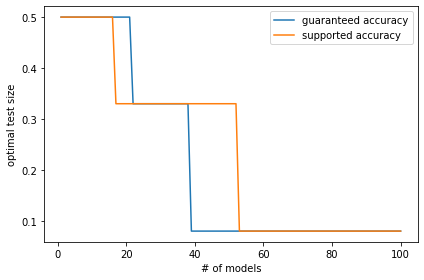

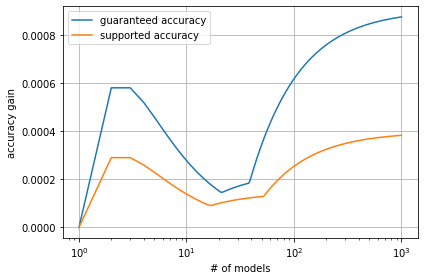

In [ ]:
import matplotlib.pyplot as plt

def guaranteed_accuracy(nr_models,means_2000,stds_2000,test_sizes_2000):

  if nr_models > 1:
    loss = [i - 2*j*np.sqrt(1/nr_models+k/(nr_models/(nr_models-1)-k)) for i,j,k in zip(means_2000,stds_2000,test_sizes_2000)]
  else:
    loss = [i - 2*j for i,j,k in zip(means_2000,stds_2000,test_sizes_2000)]
  return np.max(loss),(50-np.argmax(loss))/100

def supported_accuracy(nr_models,means_2000,stds_2000,test_sizes_2000):
  if nr_models > 1:
    loss = [i - j*np.sqrt(1/nr_models+k/(nr_models/(nr_models-1)-k)) for i,j,k in zip(means_2000,stds_2000,test_sizes_2000)]
  else:
    loss = [i - j for i,j,k in zip(means_2000,stds_2000,test_sizes_2000)]
  return np.max(loss),(50-np.argmax(loss))/100

x = np.linspace(1,100,100)
y = [guaranteed_accuracy(i,means_200,stds_200,test_sizes_200)[1] for i in x]
plt.plot(x,y,label='guaranteed accuracy')
y = [supported_accuracy(i,means_200,stds_200,test_sizes_200)[1] for i in x]
plt.plot(x,y,label='supported accuracy')
plt.xlabel('# of models')
plt.ylabel('optimal test size')
plt.tight_layout()
plt.legend()
plt.show()
x = np.linspace(1,1000,1000)
y_0 = guaranteed_accuracy(1,means_200,stds_200,test_sizes_200)[0]
y = [guaranteed_accuracy(i,means_200,stds_200,test_sizes_200)[0]- y_0 for i in x]
plt.plot(x,y,label='guaranteed accuracy')
y_0 = supported_accuracy(1,means_200,stds_200,test_sizes_200)[0]
y = [supported_accuracy(i,means_200,stds_200,test_sizes_200)[0]- y_0 for i in x]
plt.plot(x,y,label='supported accuracy')
plt.xscale('log')
plt.xlabel('# of models')
plt.ylabel('accuracy gain')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

Exactly what I hoped for. No accuracy gain for more than one model therefore, the test_size is irrelevant.

A different question is how much do you benefit from additional training data.

In [ ]:
train_sizes_10=[]
means_10 = []
stds_10 = []
for j in range(1,100): # j stands for the fraction of data available
  fraction = j/100
  xx, _, yy, _ = train_test_split(X, y, train_size = fraction, random_state = 1)
  accuracies = []
  for random_state in tqdm(range(10)): # i is the random state
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.1, random_state = random_state)
    pipe_lr.fit(x_train,y_train)
    accuracies.append(pipe_lr.score(x_test,y_test))
  means_10.append(np.mean(accuracies))
  stds_10.append(std(accuracies,0.1))
  train_sizes_10.append(fraction)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

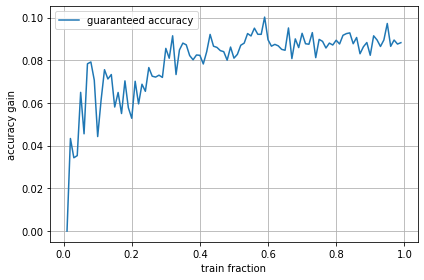

In [ ]:
def varying_training_size(nr_models,means_2000,stds_2000,test_size):

  if nr_models > 1:
    loss = [i - 2*j*np.sqrt(1/nr_models+test_size/(nr_models/(nr_models-1)-test_size)) for i,j in zip(means_2000,stds_2000)]
  else:
    loss = [i - 2*j for i,j,k in zip(means_2000,stds_2000)]
  return loss

y_0 = varying_training_size_guaranteed(10,means_10,stds_10,0.1)[0]
yy = [i - y_0 for i in varying_training_size_guaranteed(10,means_10,stds_10,0.1)]
plt.plot(train_sizes_10,yy,label='guaranteed accuracy')
plt.xlabel('train fraction')
plt.ylabel('accuracy gain')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

Looks like the algorithm saturates at 1/2 size of X, which is:

In [ ]:
len(y)/2

7885.0

datapoints.

I am interested how much test data is actually needed to saturate the non-binomial error - the error not due to not having enough data.

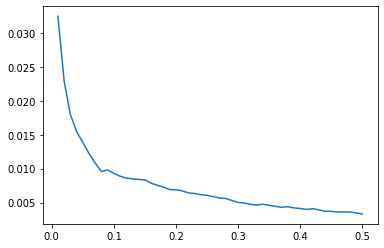

In [ ]:
plt.plot(test_sizes_200,stds_200)

Looks like 50% test-size doesn't hurt and I don't know if we've saturated yet.

In [ ]:
X_reserve, X, y_reserve, y = train_test_split(X_trimmed,y_trimmed,test_size = 0.5,stratify=y_trimmed,random_state=1)

In [ ]:
accuracies = []
for random_state in tqdm(range(200)): # i is the random state
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.66, random_state = random_state)
  pipe_lr.fit(x_train,y_train)
  accuracies.append(pipe_lr.score(x_test,y_test))
print(np.std(accuracies,ddof=1))

  0%|          | 0/200 [00:00<?, ?it/s]

0.0021479525505374753


In [ ]:
stds_200[0]

0.0033324708805992894

Indeed, it keeps going.

In [ ]:
X_reserve, X, y_reserve, y = train_test_split(X_trimmed,y_trimmed,test_size = 0.67,stratify=y_trimmed,random_state=1)
accuracies = []
for random_state in tqdm(range(200)): # i is the random state
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = random_state)
  pipe_lr.fit(x_train,y_train)
  accuracies.append(pipe_lr.score(x_test,y_test))
print(np.std(accuracies,ddof=1))

  0%|          | 0/200 [00:00<?, ?it/s]

0.0014803989444606858


In [ ]:
accuracies = []
for random_state in tqdm(range(200)): # i is the random state
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.83, random_state = random_state)
  pipe_lr.fit(x_train,y_train)
  accuracies.append(pipe_lr.score(x_test,y_test))
print(np.std(accuracies,ddof=1))

  0%|          | 0/200 [00:00<?, ?it/s]

0.0014308179146684096


The best we can do with this data is 0.14% error with 5/6 as test, but 1/6 as test already gives us 0.33%.

Decisions I have to make:
1. Ranges and hyperopt parameters
2. Hyperparameters
3. Order of models
4. Ensemble hyperparameters
5. Final metrics.

There are no cross validation loops!

In either case, I need 1/6 of the data to have a good model, so that already determines the split (unless I am willing to train the same data to answer two different questions - which wouldn't be a problem if the validation set is different).

Up until order of models, I can have different splits for different models.

So order of models, ensemble hyperparameters and final metrics 1/6 each.

I think it makes sense to have 1/6 each.

In [ ]:
st

# EDA

In [ ]:
len(X_train)

19233

In [ ]:
len(X_nu_train)

82875

In [ ]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

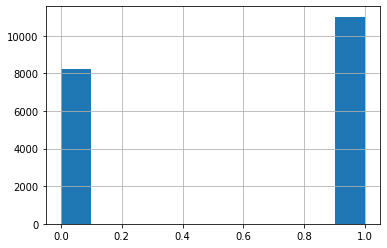

In [ ]:
X_train['HighBP'].hist()

let's add back in the dependent variable for EDA

In [ ]:
(y_train.index == X_train.index).all()

True

In [ ]:
A_train = pd.concat([X_train.copy(),y_train.copy()],axis=1)
A_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,y
207462,1.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,5.0,0.0,30.0,1.0,0.0,13.0,4.0,3.0,1.0
97487,0.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,5.0,0.0,2.0,1.0,0.0,12.0,4.0,7.0,1.0
22255,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0
46961,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0,1.0
66174,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,1.0,5.0,1.0,0.0,11.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0
11562,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0
21656,1.0,1.0,1.0,43.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,2.0,5.0,2.0,1.0,1.0,3.0,5.0,5.0,0.0
101860,1.0,1.0,1.0,31.0,1.0,0.0,2.0,0.0,1.0,1.0,...,0.0,3.0,30.0,2.0,1.0,1.0,7.0,5.0,6.0,1.0


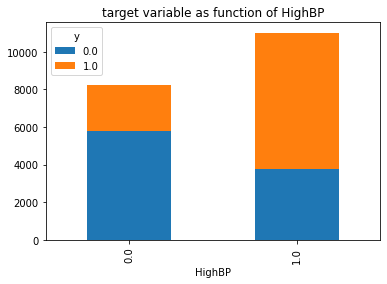

In [ ]:
A_train[['HighBP','y']].groupby(['HighBP','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of HighBP'
    )

Looks like HighBP is **very** predictive in determining heart disease.

Next is HighChol.

In [ ]:
A_train['HighChol'].unique()

array([1., 0.])

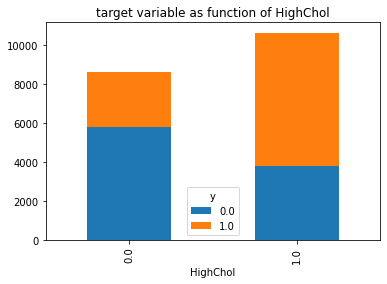

In [ ]:
A_train[['HighChol','y']].groupby(['HighChol','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of HighChol'
    )

HighChol is also very predictive so we should see significant correlation among these two.

In [ ]:
A_train['CholCheck'].unique()

array([1., 0.])

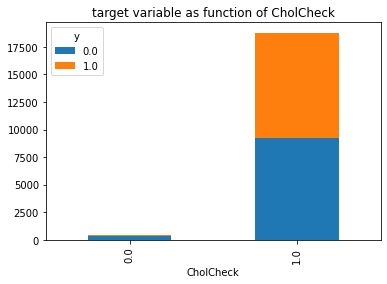

In [ ]:
A_train[['CholCheck','y']].groupby(['CholCheck','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of CholCheck'
    )

Looks like only a few people didn't have their cholesterol checked, and that those were mostly healthy.

Next is BMI which is a continuous variable.

Here we can look at 5 kinds of plot: histogram, KDE, ECDF, box plot and violin plot.

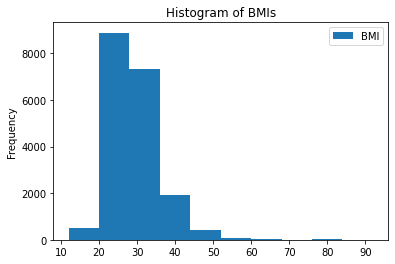

In [ ]:
A_train[['BMI']].plot(
    kind = 'hist',
    title = 'Histogram of BMIs'
)

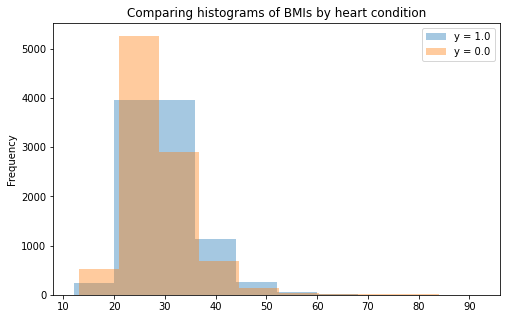

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').BMI
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of BMIs by heart condition'
  )

Looks like people with heart conditions are in general heavier.

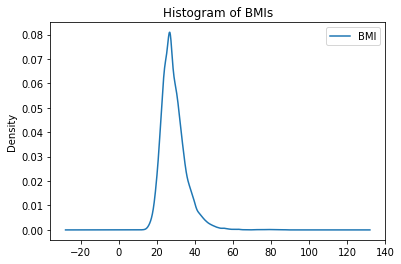

In [ ]:
A_train[['BMI']].plot(
    kind = 'kde',
    title = 'Histogram of BMIs'
)

In [ ]:
A_train[['BMI']].min()

BMI    12.0
dtype: float64

In [ ]:
A_train[['BMI']].max()

BMI    92.0
dtype: float64

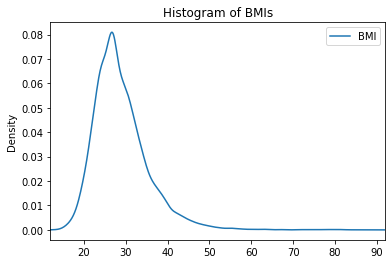

In [ ]:
A_train[['BMI']].plot(
    kind = 'kde',
    title = 'Histogram of BMIs',
    xlim = (A_train[['BMI']].min().BMI,A_train[['BMI']].max().BMI)
)

Text(0.5, 0, 'BMI')

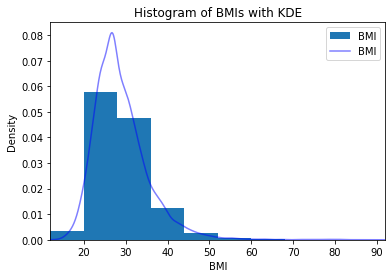

In [ ]:
ax = A_train[['BMI']].plot(
    kind = 'hist',
    density = True
)
A_train[['BMI']].plot(
    ax = ax,
    kind = 'kde',
    alpha = 0.5,
    color = 'blue',
    xlim = (A_train[['BMI']].min().BMI,A_train[['BMI']].max().BMI),
    title = 'Histogram of BMIs with KDE'
)
plt.xlabel("BMI")

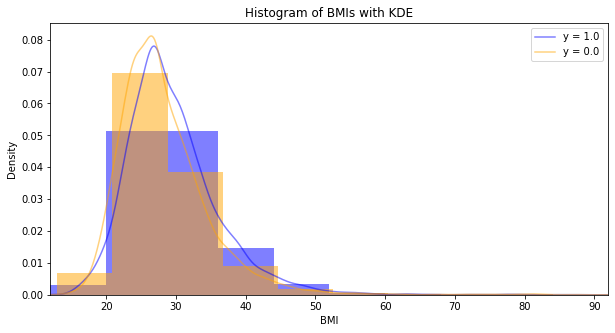

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ['blue','orange']

for value,color in zip(A_train.y.unique(),colors):
  data = A_train.query(f'y == {value}').BMI
  data.plot(
      kind = 'hist',
      density = True,
      ax = ax,
      color = color,
      alpha = 0.5
  )
  data.plot(
      ax = ax,
      kind = 'kde',
      alpha = 0.5,
      color = color,
      xlim = (A_train[['BMI']].min().BMI,A_train[['BMI']].max().BMI),
      title = 'Histogram of BMIs with KDE',
      label = f'y = {value}',
      legend = True
  )
  plt.xlabel("BMI")

We see that while the binning seems to have exaggerated the differences, the true distributions are a lot closer.

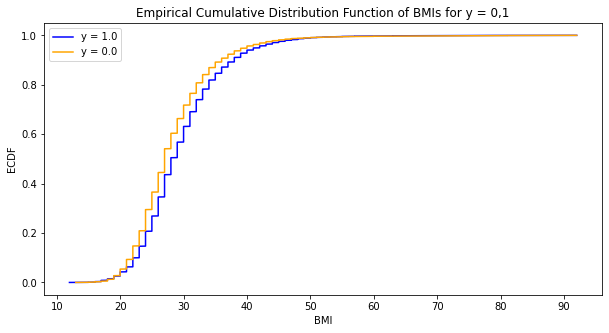

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
fig, ax = plt.subplots(figsize=(10,5))
colors = ['blue','orange']

for value,color in zip(A_train.y.unique(),colors):
  data = A_train.query(f'y == {value}').BMI
  ecdf = ECDF(data)
  ax.plot(
      ecdf.x,
      ecdf.y,
      color = color,
      #title = 'Empirical Cumulative Distribution Function of BMIs for y = 0,1',
      label = f'y = {value}',
      #legend = True
  )
plt.title('Empirical Cumulative Distribution Function of BMIs for y = 0,1')
plt.xlabel("BMI")
plt.ylabel("ECDF")
plt.legend()

Box plot:

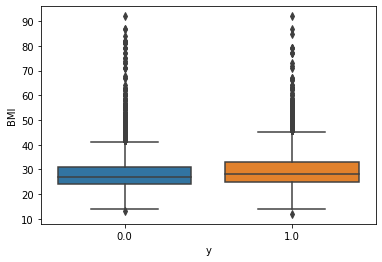

In [ ]:
import seaborn as sns
sns.boxplot(
    x = A_train.y,
    y = A_train.BMI,
)

We can see that both are a lot closer with many outliers.

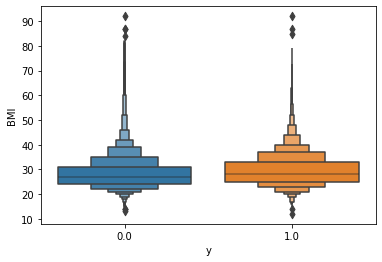

In [ ]:
sns.boxenplot(
    x = 'y',
    y = 'BMI',
    data = A_train
)

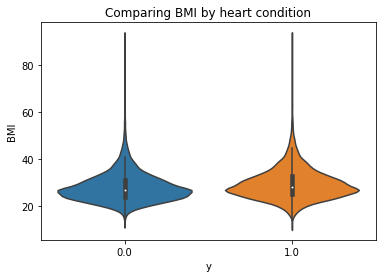

In [ ]:
sns.violinplot(
    x = 'y',
    y = 'BMI',
    data = A_train,
    scale='width'
)
plt.title("Comparing BMI by heart condition");

Let's have a look at the swarm plot of maybe HighBP and BMI.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


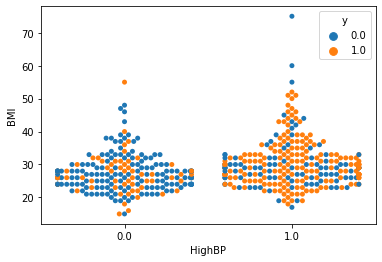

In [ ]:
sns.swarmplot(
    x = 'HighBP',
    y = 'BMI',
    hue = 'y',
    data = A_train[:500]
)

In [ ]:
A_train['Smoker'].unique()

array([1., 0.])

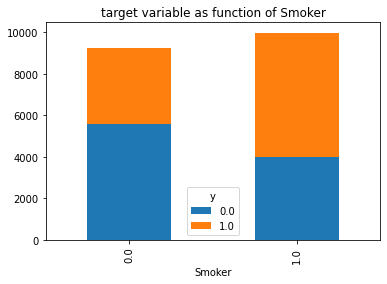

In [ ]:
A_train[['Smoker','y']].groupby(['Smoker','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of Smoker'
    )

Again, very predictive.

In [ ]:
A_train['Stroke'].unique()

array([0., 1.])

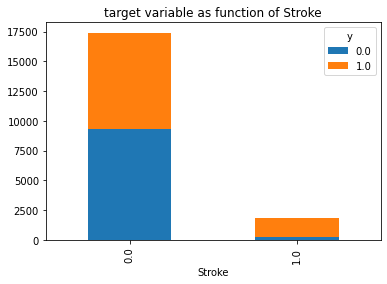

In [ ]:
A_train[['Stroke','y']].groupby(['Stroke','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of Stroke'
    )

Predictive if they had a stroke.

In [ ]:
A_train['Diabetes'].unique()

array([0., 1., 2.])

Here 0 is no diabetes, 1 is pre-diabetes and 2 is diabetes. We have to determine if we can leave these as numerical or not (in other words, is 2 'twice as bad as 1').

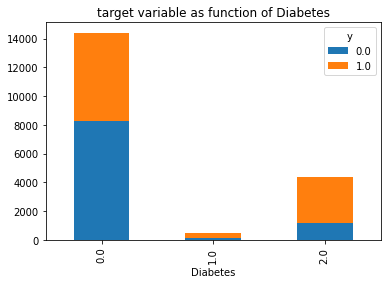

In [ ]:
A_train[['Diabetes','y']].groupby(['Diabetes','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of Diabetes'
    )

Looks like we have very few who are pre-diabetic.

Let's look at fractions.

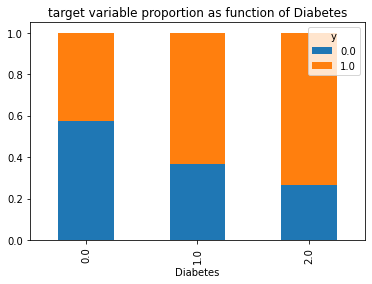

In [ ]:
A_train[['Diabetes','y']].groupby(['Diabetes','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\ 
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Diabetes'
    )

We see that diabetic is indeed worse that pre-diabetic so maybe we shouldn't mix them together. On the other hand, it doesn't look like it's right in between.

In [ ]:
A_train[['Diabetes','y']].groupby(['Diabetes','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)

y,0.0,1.0
Diabetes,,
0.0,0.572906,0.427094
1.0,0.365854,0.634146
2.0,0.265035,0.734965


If 0 corresponds to 0.573 and 2 corresponds, to 0.265, which number corresponds to 0.366?

y = m*x+b so b = 0.573 and 0.265 = 2m+0.573.

In [ ]:
abc = A_train[['Diabetes','y']].groupby(['Diabetes','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)
m = (abc.iloc[2,0] - abc.iloc[0,0])/2
m

-0.15393518898745812

In [ ]:
(abc.iloc[1,0]-abc.iloc[0,0])/m

1.3450606425666234

So let's set pre-diabetes to 1.345 and leave it as numeric.

In [ ]:
class adjustDiabetes():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    return X

In [ ]:
A_train = adjustDiabetes().fit_transform(A_train)

In [ ]:
A_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,y
207462,1.0,1.0,1.0,22.0,1.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,5.0,0.0,30.0,1.0,0.0,13.0,4.0,3.0,1.0
97487,0.0,1.0,1.0,30.0,0.0,0.0,0.0000,0.0,1.0,1.0,...,0.0,5.0,0.0,2.0,1.0,0.0,12.0,4.0,7.0,1.0
22255,0.0,0.0,1.0,23.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0
46961,0.0,1.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0,1.0
66174,1.0,1.0,1.0,30.0,1.0,0.0,0.0000,0.0,0.0,1.0,...,0.0,4.0,1.0,5.0,1.0,0.0,11.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,0.0,0.0,1.0,23.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0
11562,0.0,1.0,1.0,25.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0
21656,1.0,1.0,1.0,43.0,0.0,0.0,2.0000,1.0,1.0,1.0,...,0.0,2.0,5.0,2.0,1.0,1.0,3.0,5.0,5.0,0.0
101860,1.0,1.0,1.0,31.0,1.0,0.0,2.0000,0.0,1.0,1.0,...,0.0,3.0,30.0,2.0,1.0,1.0,7.0,5.0,6.0,1.0


We have to remember to chain this with each model.

In [ ]:
A_train['PhysActivity'].unique()

array([1., 0.])

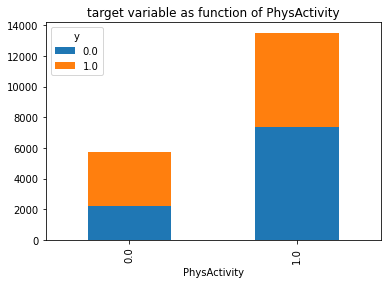

In [ ]:
A_train[['PhysActivity','y']].groupby(['PhysActivity','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of PhysActivity'
    )

Again, seems very predictive.

In [ ]:
A_train['Fruits'].unique()

array([1., 0.])

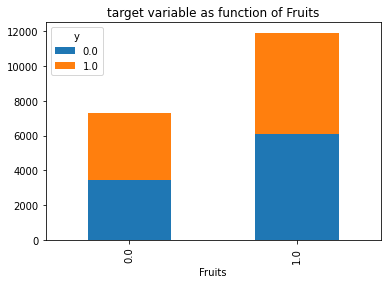

In [ ]:
A_train[['Fruits','y']].groupby(['Fruits','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of Fruits'
    )

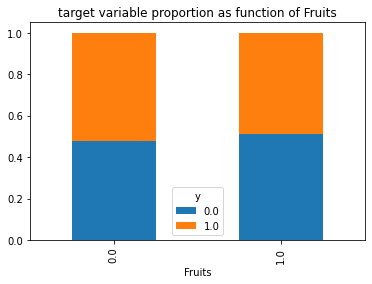

In [ ]:
A_train[['Fruits','y']].groupby(['Fruits','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Fruits'
    )

Looks like a very weak correlation.

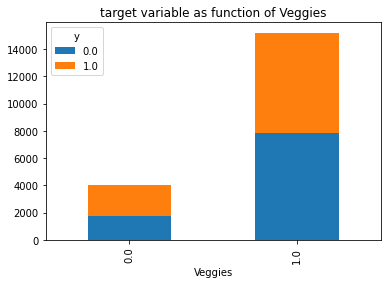

In [ ]:
A_train[['Veggies','y']].groupby(['Veggies','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of Veggies'
    )

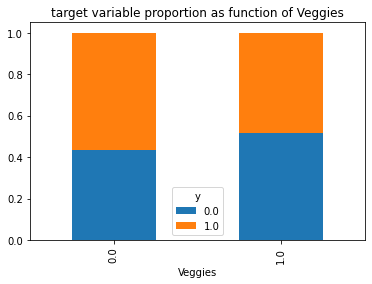

In [ ]:
A_train[['Veggies','y']].groupby(['Veggies','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Veggies'
    )

Veggies more correlated than fruit.

In [ ]:
A_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'y'],
      dtype='object')

In [ ]:
A_train['HvyAlcoholConsump'].unique()

array([0., 1.])

In [ ]:
A_train['AnyHealthcare'].unique()

array([1., 0.])

In [ ]:
A_train['NoDocbcCost'].unique()

array([0., 1.])

In [ ]:
A_train['GenHlth'].unique()

array([5., 1., 3., 4., 2.])

Here again, we have to decide whether to leave this as numeric or change to categorical.

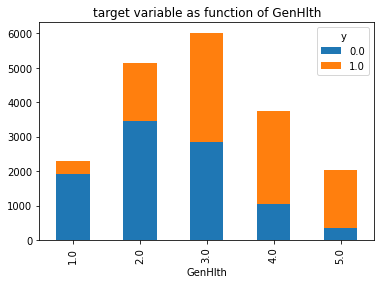

In [ ]:
A_train[['GenHlth','y']].groupby(['GenHlth','y']).y.count()\
    .unstack().plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable as function of GenHlth'
    )

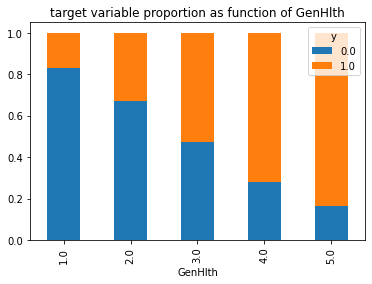

In [ ]:
A_train[['GenHlth','y']].groupby(['GenHlth','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of GenHlth'
    )

That does look approximately linear!

Except 5.0 doesn't look to be that far from 4.0.

In [ ]:
A_train[['GenHlth','y']].groupby(['GenHlth','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1).loc[:,y==0.0].squeeze()

GenHlth
1.0    0.829343
2.0    0.669776
3.0    0.472495
4.0    0.280716
5.0    0.164532
Name: 0.0, dtype: float64

Let's fit a linear model to this.

In [ ]:
abc.index.to_numpy()

array([1., 2., 3., 4., 5.])

In [ ]:
abc = A_train[['GenHlth','y']].groupby(['GenHlth','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1).loc[:,y==0.0].squeeze()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(abc.index.to_numpy().reshape(-1,1),abc.values.reshape(-1,1))
print(lr.coef_)
print(lr.intercept_)

[[-0.17186819]]
[0.99897687]


In [ ]:
for i in range(1,6):
  print(lr.intercept_ + lr.coef_*i)

[[0.82710868]]
[[0.65524049]]
[[0.48337231]]
[[0.31150412]]
[[0.13963593]]


Comparing this linear fit, we see that it's not completely the same for the 4,5 values.

Here we turn GenHlth into a category if its 5 and otherwise leave it numerical.

In [ ]:
lr = LinearRegression()
lr.fit(abc.index.to_numpy()[:-2].reshape(-1,1),abc.values[:-2].reshape(-1,1))
for i in range(1,5):
  print(lr.intercept_ + lr.coef_*i)

[[0.83562858]]
[[0.65720457]]
[[0.47878056]]
[[0.30035654]]


In [ ]:
lr = LinearRegression()
lr.fit(abc.index.to_numpy()[:-3].reshape(-1,1),abc.values[:-3].reshape(-1,1))
for i in range(1,4):
  print(lr.intercept_ + lr.coef_*i)

[[0.82934262]]
[[0.66977648]]
[[0.51021034]]


Maybe we should one-hot-encode everything?

In [ ]:
lr = LinearRegression()
lr.fit(abc.index.to_numpy()[1:-2].reshape(-1,1),abc.values[1:-2].reshape(-1,1))
for i in range(2,5):
  print(lr.intercept_ + lr.coef_*i)

[[0.66977648]]
[[0.4724946]]
[[0.27521272]]


That seems very close. Then I will OHE the 1 and 5 values and leave the others as numerical.

In [ ]:
A_train.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float)
)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,y,GenHlth_5,GenHlth_1
207462,1.0,1.0,1.0,22.0,1.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,30.0,1.0,0.0,13.0,4.0,3.0,1.0,1.0,0.0
97487,0.0,1.0,1.0,30.0,0.0,0.0,0.0000,0.0,1.0,1.0,...,0.0,2.0,1.0,0.0,12.0,4.0,7.0,1.0,1.0,0.0
22255,0.0,0.0,1.0,23.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0,0.0,1.0
46961,0.0,1.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,10.0,6.0,8.0,1.0,0.0,0.0
66174,1.0,1.0,1.0,30.0,1.0,0.0,0.0000,0.0,0.0,1.0,...,1.0,5.0,1.0,0.0,11.0,4.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,0.0,0.0,1.0,23.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0,0.0,1.0
11562,0.0,1.0,1.0,25.0,0.0,0.0,0.0000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0,0.0,0.0
21656,1.0,1.0,1.0,43.0,0.0,0.0,2.0000,1.0,1.0,1.0,...,5.0,2.0,1.0,1.0,3.0,5.0,5.0,0.0,0.0,0.0
101860,1.0,1.0,1.0,31.0,1.0,0.0,2.0000,0.0,1.0,1.0,...,30.0,2.0,1.0,1.0,7.0,5.0,6.0,1.0,0.0,0.0


In [ ]:
class adjustDiabetes_GenHlth():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float)
    )
    return X

In [ ]:
A_train.MentHlth.unique()

array([ 0.,  1.,  5., 30., 20., 15.,  2., 12., 10.,  7.,  6.,  3., 14.,
        4., 28., 25.,  8., 16., 18., 11., 21., 22.,  9., 17., 27., 13.,
       29., 24., 26., 23., 19.])

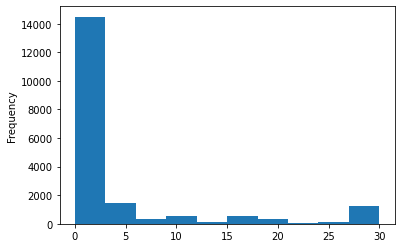

In [ ]:
A_train.MentHlth.plot(
    kind = 'hist'
)

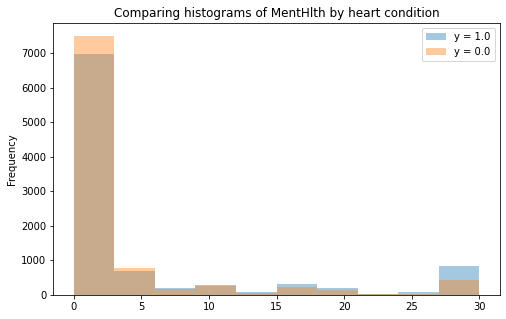

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').MentHlth
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of MentHlth by heart condition'
  )

There does seem to be a correlation with mental health in the most extreme bins.

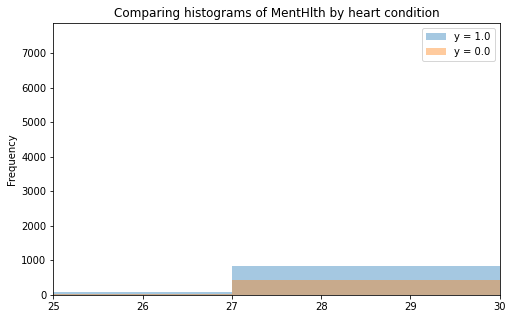

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').MentHlth
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of MentHlth by heart condition',
      xlim = (25,30)
  )

In [ ]:
len(A_train)

19233

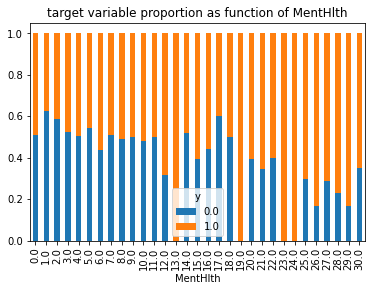

In [ ]:
A_train[['MentHlth','y']].groupby(['MentHlth','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of MentHlth'
    )

It looks pretty noisy. Also notice the xlim didn't divide into bins correctly.

There is a general linear trend that seems like it would be beneficial to have this as a numerical column.

However, looking at the histogram plot above, maybe we should keep the lowest and highest bins as categorical.

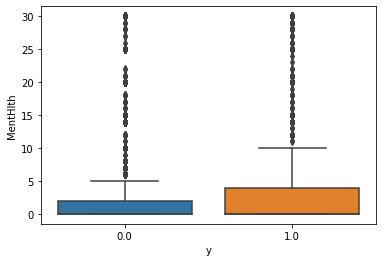

In [ ]:
import seaborn as sns
sns.boxplot(
    x = A_train.y,
    y = A_train.MentHlth,
)

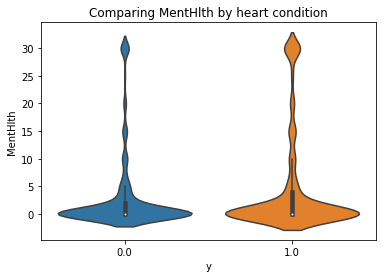

In [ ]:
sns.violinplot(
    x = 'y',
    y = 'MentHlth',
    data = A_train,
    scale='width'
)
plt.title("Comparing MentHlth by heart condition");

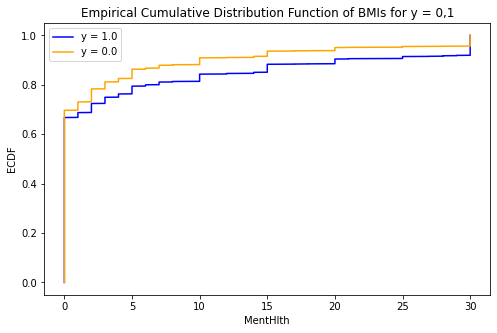

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

colors = ['blue','orange']
for value,color in zip(A_train.y.unique(),colors):
  data = A_train.query(f'y == {value}').MentHlth
  ecdf = ECDF(data)
  ax.plot(
      ecdf.x,
      ecdf.y,
      color = color,
      label = f'y = {value}',
  )
plt.title('Empirical Cumulative Distribution Function of BMIs for y = 0,1')
plt.xlabel("MentHlth")
plt.ylabel("ECDF")
plt.legend()

In [ ]:
A_train.MentHlth.value_counts().sort_values()

19.0        1
24.0        1
23.0        1
13.0        3
11.0        4
9.0         4
22.0        5
26.0        6
27.0        7
16.0        9
17.0       10
18.0       14
29.0       18
21.0       23
28.0       26
12.0       35
8.0        45
14.0       85
6.0        94
25.0      111
7.0       219
4.0       261
20.0      308
1.0       513
3.0       515
15.0      518
10.0      550
5.0       665
2.0       861
30.0     1202
0.0     13119
Name: MentHlth, dtype: int64

We see that 30 is highly populated so we definitely need to create its own categorical column. Also for 0.

In [ ]:
class adjustDiabetes_GenHlth_MentHlth():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float)
    )
    return X

In [ ]:
A_train = adjustDiabetes_GenHlth_MentHlth().fit_transform(A_train)

In [ ]:
A_train.PhysHlth.unique()

array([30.,  2.,  0.,  5., 15., 10., 20.,  1.,  7.,  3., 14.,  4., 28.,
       25.,  8., 17., 12., 29., 21., 18.,  6., 26., 23., 24., 11.,  9.,
       27., 13., 16., 22., 19.])

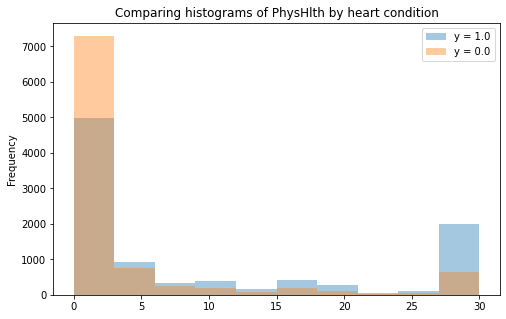

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').PhysHlth
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of PhysHlth by heart condition'
  )

Much clearer correlation here!

In [ ]:
?A_train.MentHlth.plot()

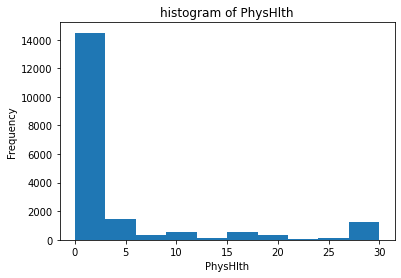

In [ ]:
A_train.MentHlth.plot(
    kind = 'hist',
    title = 'histogram of PhysHlth'
)
plt.xlabel('PhysHlth');

In [ ]:
A_train.PhysHlth.value_counts().sort_values()

19.0        2
13.0        3
24.0        4
22.0        5
11.0        5
23.0        7
26.0       12
17.0       12
16.0       12
9.0        12
27.0       13
18.0       14
29.0       44
12.0       49
21.0       57
8.0        63
28.0       77
6.0       140
25.0      144
14.0      212
20.0      368
7.0       376
4.0       394
15.0      567
10.0      570
3.0       630
5.0       641
1.0       685
2.0      1062
30.0     2523
0.0     10530
Name: PhysHlth, dtype: int64

Again, we know we have to create a new column for 30.

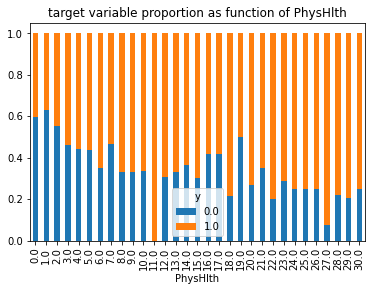

In [ ]:
A_train[['PhysHlth','y']].groupby(['PhysHlth','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of PhysHlth'
    )

In this case, it seems that not just 0, but 0,1,2 are all higher than the rest.

In [ ]:
class adjustFeatures():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float),
    PhysHlth_30 = lambda row: (row.PhysHlth == 30.0).astype(float),
    PhysHlth_012 = lambda row: (row.PhysHlth < 3.0).astype(float)
    )
    return X

In [ ]:
A_train = adjustFeatures().fit_transform(A_train)

In [ ]:
A_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'y', 'GenHlth_5',
       'GenHlth_1', 'MentHlth_30', 'MentHlth_0', 'PhysHlth_30',
       'PhysHlth_012'],
      dtype='object')

In [ ]:
A_train.DiffWalk.unique()

array([1., 0.])

In [ ]:
A_train.Sex.unique()

array([0., 1.])

In [ ]:
A_train.Age.unique()

array([13., 12., 10., 11.,  8.,  9.,  6.,  7.,  5.,  4.,  1.,  3.,  2.])

In [ ]:
A_train.Education.unique()

array([4., 5., 6., 2., 3., 1.])

In [ ]:
A_train.Income.unique()

array([3., 7., 4., 8., 1., 5., 6., 2.])

Three more categorical columns.

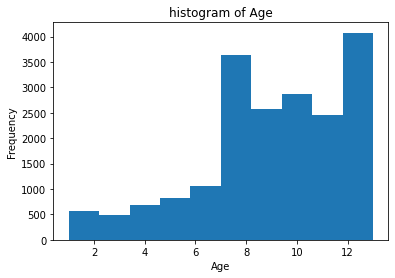

In [ ]:
A_train.Age.plot(
    kind = 'hist',
    title = 'histogram of Age'
)
plt.xlabel('Age');

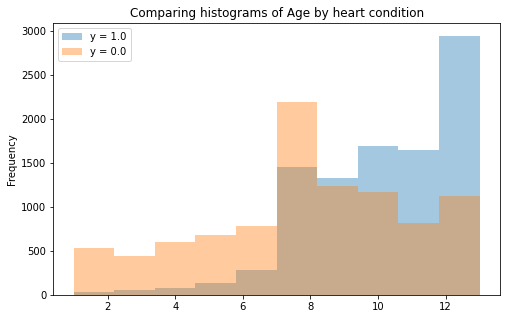

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').Age
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of Age by heart condition'
  )

Looks like age is very predictive. The y = 1 population has a threshold at 7, it seems.

In [ ]:
A_train.query(f'y==1.0').Age.value_counts()

13.0    1697
10.0    1696
11.0    1651
9.0     1334
12.0    1250
8.0      884
7.0      573
6.0      280
5.0      137
4.0       72
3.0       52
2.0       18
1.0       10
Name: Age, dtype: int64

I'm a little sick of these binned graphs. Line plots would be a lot better. Or KDEs.

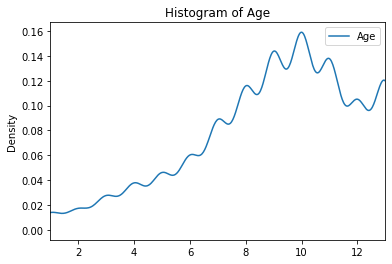

In [ ]:
A_train[['Age']].plot(
    kind = 'kde',
    title = 'Histogram of Age',
    xlim = (A_train[['Age']].min().Age,A_train[['Age']].max().Age)
)

I have no idea why it's so wavy.

Text(0, 0.5, 'Count')

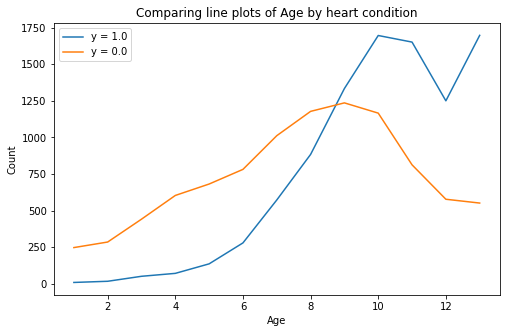

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train[['Age','y']].query(f'y == {value}').groupby(['Age']).Age.count()
  data.plot(
      kind = 'line',
      ax = ax,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing line plots of Age by heart condition'
  )
plt.ylabel('Count')

Now let's take the proportion. Here the bar plots were alright.

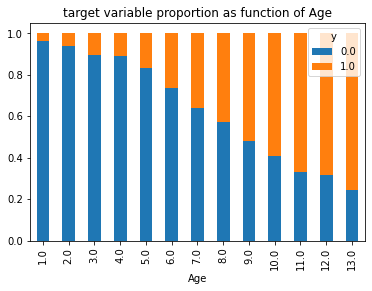

In [ ]:
A_train[['Age','y']].groupby(['Age','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Age'
    )

Again, intermediate values seem to be well-described by a linear relationship. We should maybe just add categorical values for 1,2,3 and 12,13. Let's see the value_counts.

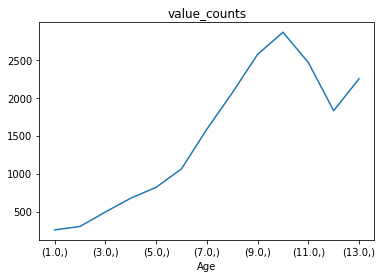

In [ ]:
A_train[['Age']].value_counts().sort_index().plot(
    kind='line',
    title='value_counts'
)

Looks like we have at least a few values in each bin.

Since we have so many values in 12, 13, maybe these could be separate bins, although it seems one bin will do fine, too.

In [ ]:
class adjustFeatures():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float),
    PhysHlth_30 = lambda row: (row.PhysHlth == 30.0).astype(float),
    PhysHlth_012 = lambda row: (row.PhysHlth < 3.0).astype(float),
    Age_123 = lambda row: (row.Age < 4.0).astype(float),
    Age_12_13 = lambda row: (row.Age > 11.0).astype(float),
    )
    return X

In [ ]:
A_train = adjustFeatures().fit_transform(A_train)

In [ ]:
A_train.Education.unique()

array([4., 5., 6., 2., 3., 1.])

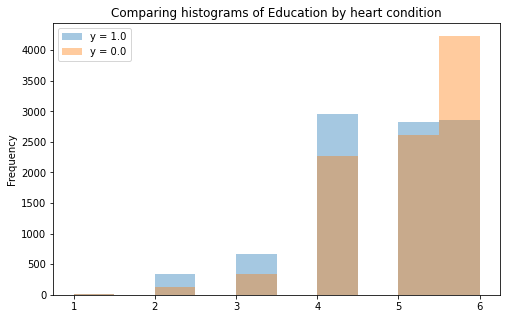

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').Education
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of Education by heart condition'
  )

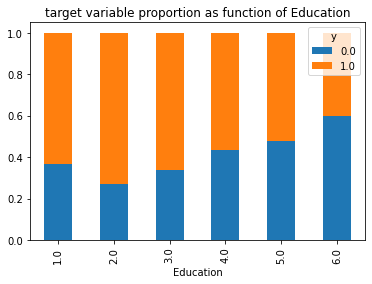

In [ ]:
A_train[['Education','y']].groupby(['Education','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Education'
    )

We can forget about the 1.0 statistic.

Again, the trend seems to be about linear except for 5.0 which is closer to 4.0 than 6.0.

In [ ]:
class adjustFeatures():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float),
    PhysHlth_30 = lambda row: (row.PhysHlth == 30.0).astype(float),
    PhysHlth_012 = lambda row: (row.PhysHlth < 3.0).astype(float),
    Age_123 = lambda row: (row.Age < 4.0).astype(float),
    Age_12_13 = lambda row: (row.Age > 11.0).astype(float),
    Education_5 = lambda row: (row.Education == 5.0).astype(float),
    )
    return X

In [ ]:
A_train.Income.unique()

array([3., 7., 4., 8., 1., 5., 6., 2.])

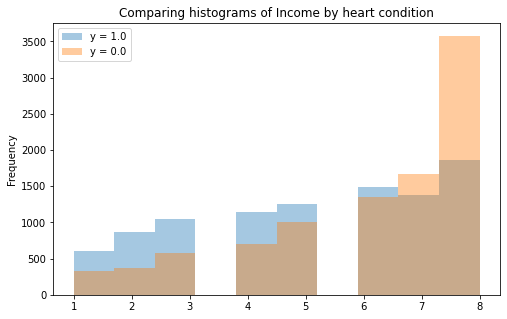

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

for value in A_train.y.unique():
  data = A_train.query(f'y == {value}').Income
  data.plot(
      kind = 'hist',
      ax = ax,
      alpha = 0.4,
      label = f'y = {value}',
      legend = True,
      title = 'Comparing histograms of Income by heart condition'
  )

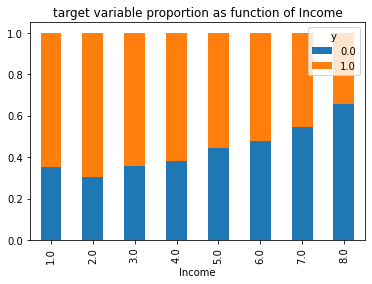

In [ ]:
A_train[['Income','y']].groupby(['Income','y']).y.count()\
    .unstack().apply(lambda x: x/x.sum(),axis = 1)\
    .plot(
        kind = 'bar',
        stacked = True,
        title = 'target variable proportion as function of Income'
    )

Again, apart from 1.0 and 8.0, the income seems to be a linear relationship.

In [ ]:
class adjustFeatures():
  def fit_transform(self,X):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float),
    PhysHlth_30 = lambda row: (row.PhysHlth == 30.0).astype(float),
    PhysHlth_012 = lambda row: (row.PhysHlth < 3.0).astype(float),
    Age_123 = lambda row: (row.Age < 4.0).astype(float),
    Age_12_13 = lambda row: (row.Age > 11.0).astype(float),
    Education_5 = lambda row: (row.Education == 5.0).astype(float),
    Income_8 = lambda row: (row.Income == 8.0).astype(float),
    Income_1 = lambda row: (row.Income == 1.0).astype(float),
    )
    return X

In [ ]:
A_train = adjustFeatures().fit_transform(A_train)
A_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'y', 'GenHlth_5',
       'GenHlth_1', 'MentHlth_30', 'MentHlth_0', 'PhysHlth_30', 'PhysHlth_012',
       'Age_123', 'Age_12_13', 'Education_5', 'Income_8', 'Income_1'],
      dtype='object')

In [ ]:
len(A_train.columns)

33

Now that each column is numerical, we can continue to pair-wise correlations and the like.

In [ ]:
A_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19233 entries, 207462 to 19341
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighBP             19233 non-null  float64
 1   HighChol           19233 non-null  float64
 2   CholCheck          19233 non-null  float64
 3   BMI                19233 non-null  float64
 4   Smoker             19233 non-null  float64
 5   Stroke             19233 non-null  float64
 6   Diabetes           19233 non-null  float64
 7   PhysActivity       19233 non-null  float64
 8   Fruits             19233 non-null  float64
 9   Veggies            19233 non-null  float64
 10  HvyAlcoholConsump  19233 non-null  float64
 11  AnyHealthcare      19233 non-null  float64
 12  NoDocbcCost        19233 non-null  float64
 13  GenHlth            19233 non-null  float64
 14  MentHlth           19233 non-null  float64
 15  PhysHlth           19233 non-null  float64
 16  DiffWalk         

First, let's put y as the last column again.

In [ ]:
B_train = A_train.drop(columns=['y'])
B_train['y'] = A_train['y']
A_train = B_train
A_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'GenHlth_5',
       'GenHlth_1', 'MentHlth_30', 'MentHlth_0', 'PhysHlth_30', 'PhysHlth_012',
       'Age_123', 'Age_12_13', 'Education_5', 'Income_8', 'Income_1', 'y'],
      dtype='object')

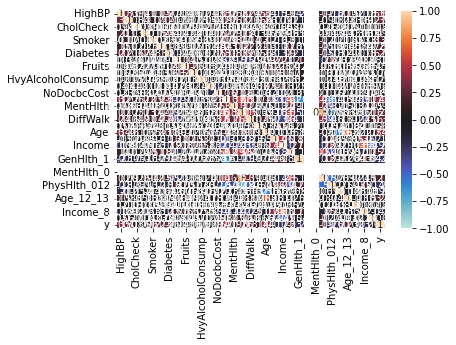

In [ ]:
sns.heatmap(
    A_train.corr(),
    annot = True,
    center = 0,
    vmin = -1,
    vmax = 1
)

Unreadable. Best to use original A_train.

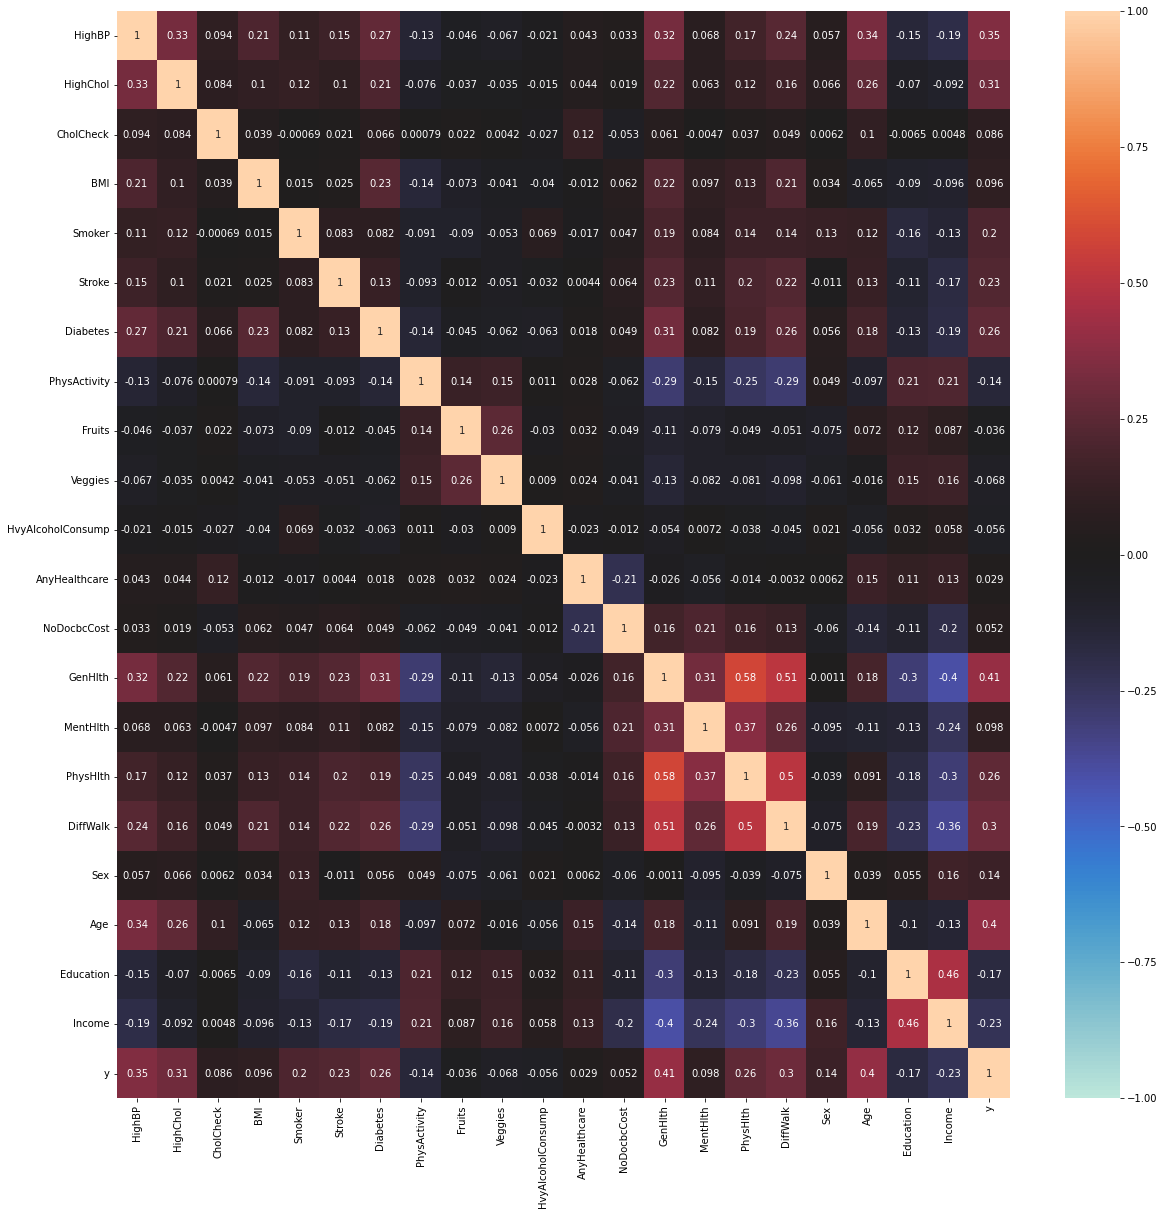

In [ ]:
B_train = pd.concat([X_train.copy(),y_train.copy()],axis=1)
plt.figure(figsize = (20,20))
sns.heatmap(
    B_train.corr(),
    annot = True,
    center = 0,
    vmin = -1,
    vmax = 1
)

GenHlth, MentHlth, PhysHlth and DiffWalk are all pretty correlated. Otherwise, they are pretty unrelated.

<Figure size 1440x1440 with 0 Axes>

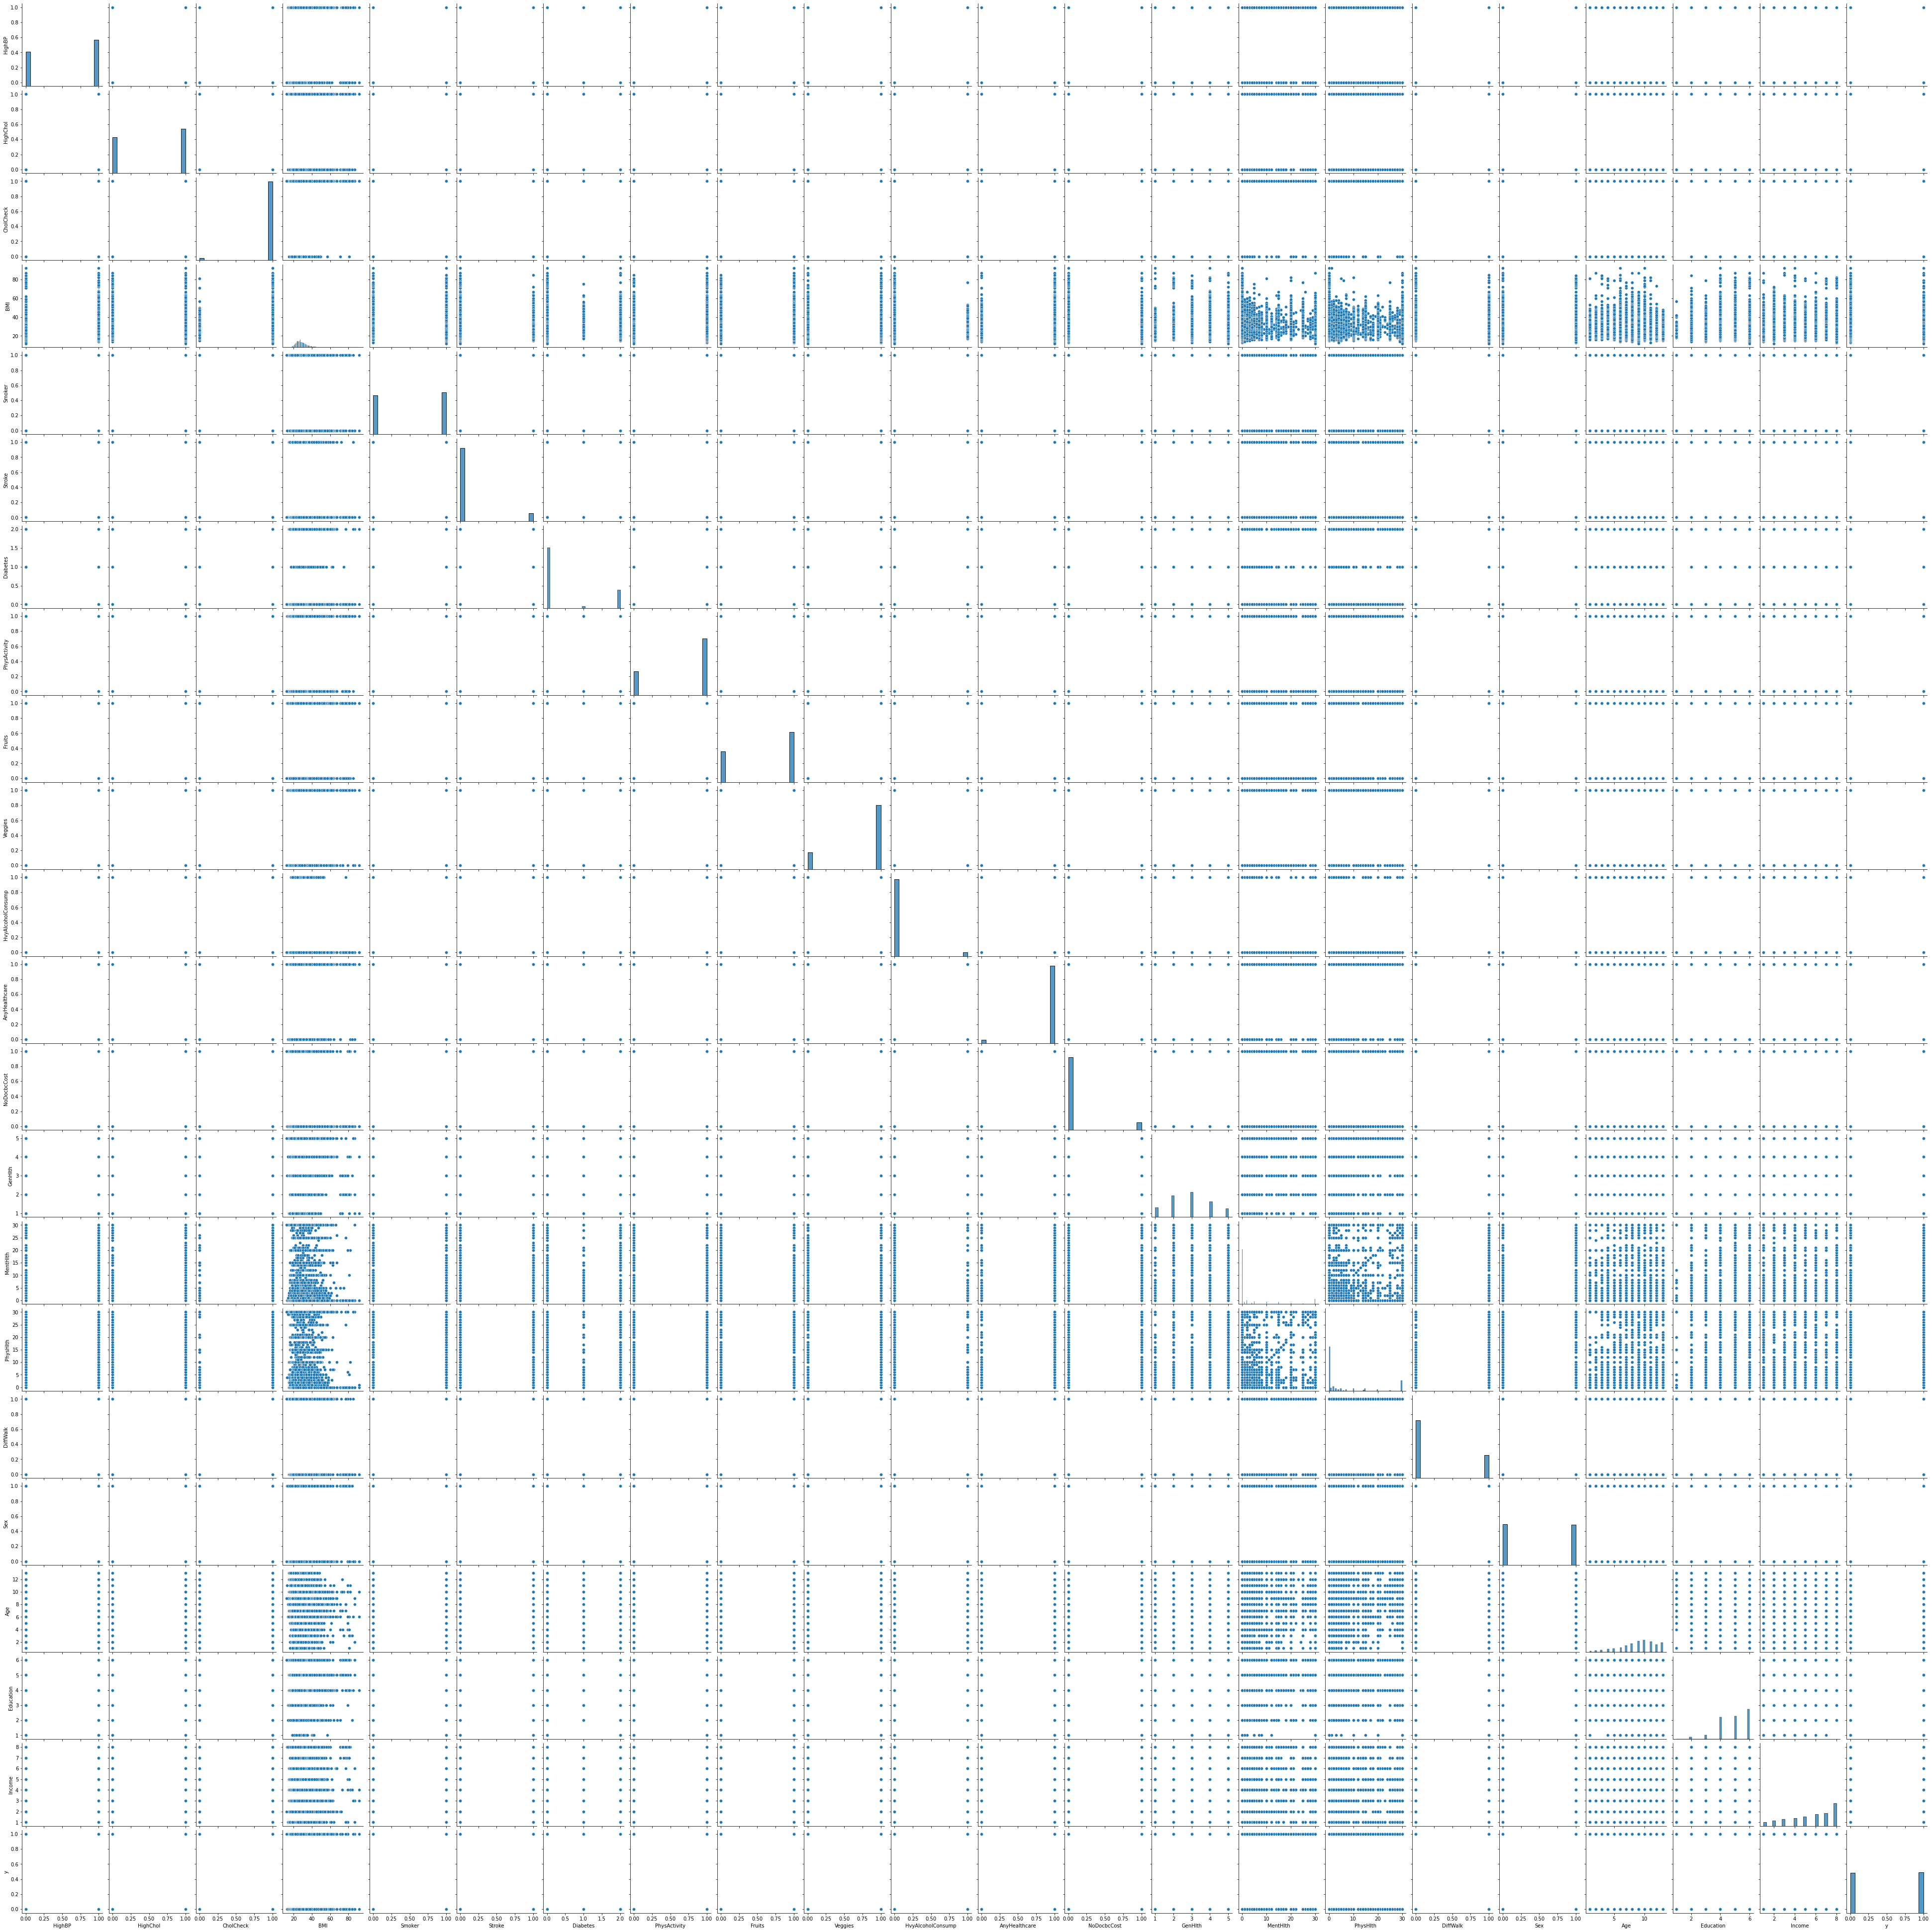

In [ ]:
plt.figure(figsize = (20,20))
sns.pairplot(B_train)

Now we can train logistic_regression and compare F1 values etc.

In [ ]:
def pipe_lr(**params):
  return make_pipeline(
    adjustFeatures(),
    StandardScaler(),
    PCA(),
    LogisticRegression(C = params['C']))

In [ ]:
params = {'C':1}
abc = pipe_lr(**params)
abc.fit(X_train,y_train)

Pipeline(steps=[('adjustfeatures', adjustFeatures()),
                ('standardscaler', StandardScaler()), ('pca', PCA()),
                ('logisticregression', LogisticRegression(C=1))])

In [ ]:
accuracy_score(y_train,abc.predict(X_train))

0.7729943326574117

In [ ]:
for exp in range(-6,6):
  params = {'C':10**exp}
  abc = pipe_lr(**params)
  abc.fit(X_train,y_train)
  print(f'for C = {10**exp}, the accuracy is {accuracy_score(y_train,abc.predict(X_train))}')

for C = 1e-06, the accuracy is 0.7433577704986222
for C = 1e-05, the accuracy is 0.7456455051214059
for C = 0.0001, the accuracy is 0.759423906826808
for C = 0.001, the accuracy is 0.772110435189518
for C = 0.01, the accuracy is 0.7725783809078147
for C = 0.1, the accuracy is 0.7733062964696096
for C = 1, the accuracy is 0.7729943326574117
for C = 10, the accuracy is 0.7729943326574117
for C = 100, the accuracy is 0.7729423386887121
for C = 1000, the accuracy is 0.7729423386887121
for C = 10000, the accuracy is 0.7729423386887121
for C = 100000, the accuracy is 0.7729423386887121


regularization doesn't help with logistic regression in this case.

# Imports

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics \
  import f1_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, accuracy_score
%matplotlib inline
from sklearn.base import BaseEstimator,TransformerMixin

class adjustFeatures(BaseEstimator, TransformerMixin):
  def __init(self):
    return self
  def fit(self,X,y=0):
    return self
  def transform(self,X,y=0):
    X.loc[X['Diabetes'] == 1,['Diabetes']] = 1.3451
    X = X.assign(
    GenHlth_5 = lambda row: (row.GenHlth == 5.0).astype(float),
    GenHlth_1 = lambda row: (row.GenHlth == 1.0).astype(float),
    MentHlth_30 = lambda row: (row.GenHlth == 30.0).astype(float),
    MentHlth_0 = lambda row: (row.GenHlth == 0.0).astype(float),
    PhysHlth_30 = lambda row: (row.PhysHlth == 30.0).astype(float),
    PhysHlth_012 = lambda row: (row.PhysHlth < 3.0).astype(float),
    Age_123 = lambda row: (row.Age < 4.0).astype(float),
    Age_12_13 = lambda row: (row.Age > 11.0).astype(float),
    Education_5 = lambda row: (row.Education == 5.0).astype(float),
    Income_8 = lambda row: (row.Income == 8.0).astype(float),
    Income_1 = lambda row: (row.Income == 1.0).astype(float),
    )
    return X
  
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
      for clf in self.classifiers:
        clf.fit(X,y)
      return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote
            print('Hello')

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        #maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

# Loading and dividing the data

In [ ]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download alexteboul/heart-disease-health-indicators-dataset
# ! unzip heart-disease-health-indicators-dataset.zip
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
#df = pd.read_csv('health_indicators.csv')
df = df.sample(frac=1,random_state = 1).reset_index(drop=True) # reshuffling dataframe
y = df.iloc[:,0]
X = df.iloc[:,1:]
y_trimmed = y[y==0.0].iloc[:23893]
y_not_used = y[y==0.0].iloc[23893:]
y_trimmed = pd.concat([y[y==1.0],y_trimmed])
X_trimmed = X.loc[y_trimmed.index]
X_not_used = X.loc[y_not_used.index]
X_trimmed['y'] = y_trimmed
X_trimmed = X_trimmed.sample(frac=1, random_state = 1) # reshuffling dataframe, keeping old indices
y_trimmed = X_trimmed['y']
X_trimmed.drop(columns=['y'],inplace=True)
X_rest, X_test, y_rest, y_test = train_test_split(X_trimmed,y_trimmed,test_size = 0.167, random_state = 1)
X_rest, X_ensemble, y_rest, y_ensemble = train_test_split(X_rest,y_rest,test_size = 0.166, random_state = 1)
X_rest, X_compare, y_rest, y_compare = train_test_split(X_rest,y_rest,test_size = 0.166, random_state = 1)
X_rest, X_hyper_test, y_rest, y_hyper_test = train_test_split(X_rest,y_rest,test_size = 0.167, random_state = 1)
X_train, X_hyper_valid, y_train, y_hyper_valid = train_test_split(X_rest,y_rest,test_size = 0.166, random_state = 1)

The data is split into not_used, test, ensemble, compare, hyper_test, hyper_valid, train.

Let's also split not_used because we may decide to use it, depending on the model.

In [ ]:
X_nu_rest, X_nu_test, y_nu_rest, y_nu_test = train_test_split(X_not_used,y_not_used,test_size = 0.167, random_state = 1)
X_nu_rest, X_nu_ensemble, y_nu_rest, y_nu_ensemble = train_test_split(X_nu_rest,y_nu_rest,test_size = 0.166, random_state = 1)
X_nu_rest, X_nu_compare, y_nu_rest, y_nu_compare = train_test_split(X_nu_rest,y_nu_rest,test_size = 0.166, random_state = 1)
X_nu_rest, X_nu_hyper_test, y_nu_rest, y_nu_hyper_test = train_test_split(X_nu_rest,y_nu_rest,test_size = 0.167, random_state = 1)
X_nu_train, X_nu_hyper_valid, y_nu_train, y_nu_hyper_valid = train_test_split(X_nu_rest,y_nu_rest,test_size = 0.166, random_state = 1)

# Tuning hyperparameters

## Logistic Regression

In [ ]:
def pipe_lr(**params):
  return make_pipeline(
    adjustFeatures(),
    StandardScaler(),
    PCA(),
    LogisticRegression(C = params['C']))
  

In [ ]:
for exp in range(-6,6):
  params = {'C':10**exp}
  abc = pipe_lr(**params)
  abc.fit(X_train,y_train)
  print(f'for C = {10**exp}, the accuracy on the single target data is '
        f'{accuracy_score(y_nu_train,abc.predict(X_nu_train))}')

for C = 1e-06, the accuracy on the single target data is 0.636102564102564
for C = 1e-05, the accuracy on the single target data is 0.739921568627451
for C = 0.0001, the accuracy on the single target data is 0.742395173453997
for C = 0.001, the accuracy on the single target data is 0.7437828054298643
for C = 0.01, the accuracy on the single target data is 0.7452187028657616
for C = 0.1, the accuracy on the single target data is 0.7452790346907994
for C = 1, the accuracy on the single target data is 0.7452549019607844
for C = 10, the accuracy on the single target data is 0.7452428355957768
for C = 100, the accuracy on the single target data is 0.7452307692307693
for C = 1000, the accuracy on the single target data is 0.7452307692307693
for C = 10000, the accuracy on the single target data is 0.7452307692307693
for C = 100000, the accuracy on the single target data is 0.7452307692307693


As we can see, we get about 0.745 accuracy on this set which would be better if we just predicted 'all 0'. Therefore, we need to use a different metric. Here we use f1_score.

In [ ]:
abc = pipe_lr(**{'C':1})
abc.fit(X_train,y_train)
print(f'for C = {1}, the f1_score on the single target data is '
      f'{f1_score(y_nu_train,abc.predict(X_nu_train))}')
print(f'for C = {1}, the f1_score on the train data is '
      f'{f1_score(y_train,abc.predict(X_train))}')

for C = 1, the f1_score on the single target data is 0.0
for C = 1, the f1_score on the train data is 0.7800503778337531


Here, either precision or recall is zero so this doesn't work. We need to add them together.

In [ ]:
print(f'for C = {1}, the f1_score on all train data is '
      f'{f1_score(pd.concat([y_nu_train,y_train]),abc.predict(pd.concat([X_nu_train,X_train])))}')

for C = 1, the f1_score on all train data is 0.3780088862848493


In [ ]:
from sklearn.metrics import recall_score, precision_score

print(f'for C = {1}, the recall on all train data is '
      f'{recall_score(pd.concat([y_nu_train,y_train]),abc.predict(pd.concat([X_nu_train,X_train])))}')

print(f'for C = {1}, the precision on all train data is '
      f'{precision_score(pd.concat([y_nu_train,y_train]),abc.predict(pd.concat([X_nu_train,X_train])))}')

for C = 1, the recall on all train data is 0.8019473793246322
for C = 1, the precision on all train data is 0.24728503896767598


In [ ]:
print(f'for C = {1}, the recall on all train data is '
      f'{recall_score(y_nu_train,abc.predict(X_nu_train))}')

print(f'for C = {1}, the precision on all train data is '
      f'{precision_score(y_nu_train,abc.predict(X_nu_train))}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for C = 1, the recall on all train data is 0.0
for C = 1, the precision on all train data is 0.0


I don't know if I think it's fair to use f1_score because when there are no true positives, it gives zero even though the accuracy is 0.75.

In [ ]:
from sklearn.metrics import roc_auc_score
print(f'for C = {1}, the auc on all train data is '
      f'{roc_auc_score(y_nu_train,abc.predict(X_nu_train))}')

ValueError: ignored

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'for C = {1}, the balanced accuracy on single target train data is '
      f'{balanced_accuracy_score(y_nu_train,abc.predict(X_nu_train))}')

for C = 1, the balanced accuracy on single target train data is 0.7452549019607844


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
print(f'for C = {1}, the accuracy on single target train data is '
      f'{accuracy_score(y_nu_train,abc.predict(X_nu_train))}')

for C = 1, the accuracy on single target train data is 0.7452549019607844


I still want something that makes me look better than 'just predict 0'. Let's find the balanced accuracy of 'just write zero'.

In [ ]:
print(f'for C = {1}, the balanced accuracy on all train data is '
      f'{balanced_accuracy_score(pd.concat([y_nu_train,y_train]),abc.predict(pd.concat([X_nu_train,X_train])))}')

print(f'for C = {1}, the balanced accuracy of just predict 0 is '
      f'{balanced_accuracy_score(pd.concat([y_nu_train,y_train]),np.zeros(len(pd.concat([y_nu_train,y_train]))))}')


for C = 1, the balanced accuracy on all train data is 0.7735265267488672
for C = 1, the balanced accuracy of just predict 0 is 0.5


Success!! This is what I wanted.

For posterity, here is the recall.

In [ ]:
print(f'for C = {1}, the recall on all train data is '
      f'{recall_score(pd.concat([y_nu_train,y_train]),abc.predict(pd.concat([X_nu_train,X_train])))}')


for C = 1, the recall on all train data is 0.8019473793246322


That means we predict 80.2% of all cases with heart disease correctly.

sklearn doesn't implement specificity, so we need to do it manually:

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(pd.concat([y_nu_train,y_train]), abc.predict(pd.concat([X_nu_train,X_train]))).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.7451056741731023


This means that we predict 74.5% of people without heart disease correctly, in other words we have a 25.5% false positive rate.

Now that we know this, let's evaluate on the next dataset to see if those numbers hold up.

In [ ]:
print(f'for C = {1}, the recall on all train data is '
      f'{recall_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')


for C = 1, the recall on all train data is 0.7850714663843303


It does not hold up. Our actual recall is 78.5% (validated on a new data set).

In [ ]:
tn, fp, fn, tp = confusion_matrix(pd.concat([y_nu_hyper_valid,y_hyper_valid]), abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid]))).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.7417010197439792


Also, our specificity is 74.1%.

Let's make sure that C = 1 is still the best.

In [ ]:
for exp in range(-6,6):
  params = {'C':10**exp}
  abc = pipe_lr(**params)
  abc.fit(X_train,y_train)
  print(f'for C = {10**exp}, the balanced accuracy on the validation set is '
        f'{balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')

for C = 1e-06, the balanced accuracy on the validation set is 0.7353705337027321
for C = 1e-05, the balanced accuracy on the validation set is 0.7417434454259573
for C = 0.0001, the balanced accuracy on the validation set is 0.751774556444161
for C = 0.001, the balanced accuracy on the validation set is 0.7631823126456041
for C = 0.01, the balanced accuracy on the validation set is 0.7635283655094682
for C = 0.1, the balanced accuracy on the validation set is 0.7641597113434127
for C = 1, the balanced accuracy on the validation set is 0.7633862430641547
for C = 10, the balanced accuracy on the validation set is 0.7634133639146646
for C = 100, the balanced accuracy on the validation set is 0.7634133639146646
for C = 1000, the balanced accuracy on the validation set is 0.7634133639146646
for C = 10000, the balanced accuracy on the validation set is 0.7634133639146646
for C = 100000, the balanced accuracy on the validation set is 0.7634133639146646


Given this data, we would choose C = 0.1.

Let's instead train on all the data (also the nu part) to see what we would get.

In [ ]:
for exp in range(-6,6):
  params = {'C':10**exp}
  abc = pipe_lr(**params)
  abc.fit(pd.concat([X_nu_train,X_train]),pd.concat([y_nu_train,y_train]))
  print(f'for C = {10**exp}, the balanced accuracy on the validation set is '
        f'{balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')

for C = 1e-06, the balanced accuracy on the validation set is 0.5
for C = 1e-05, the balanced accuracy on the validation set is 0.5
for C = 0.0001, the balanced accuracy on the validation set is 0.5186519378098942
for C = 0.001, the balanced accuracy on the validation set is 0.5486735707440996
for C = 0.01, the balanced accuracy on the validation set is 0.5587805742005221
for C = 0.1, the balanced accuracy on the validation set is 0.5602331118219802
for C = 1, the balanced accuracy on the validation set is 0.5602059909714703
for C = 10, the balanced accuracy on the validation set is 0.5602059909714703
for C = 100, the balanced accuracy on the validation set is 0.5602059909714703
for C = 1000, the balanced accuracy on the validation set is 0.5602059909714703
for C = 10000, the balanced accuracy on the validation set is 0.5602059909714703
for C = 100000, the balanced accuracy on the validation set is 0.5602059909714703


As expected, we would do terribly. Let's set C = 0.1, as before, and try out different edges.

In [ ]:
def predict(classifier, edge,data):
  return (classifier.predict_proba(data)[:,1] > edge*np.ones(len(data))).astype(float)

for edge in np.arange(0,0.2,0.01):
  params = {'C':0.1}
  abc = pipe_lr(**params)
  abc.fit(pd.concat([X_nu_train,X_train]),pd.concat([y_nu_train,y_train]))
  print(f'for edge = {edge}, the balanced accuracy on the validation set is '
        f'{balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')

for edge = 0.0, the balanced accuracy on the validation set is 0.5
for edge = 0.01, the balanced accuracy on the validation set is 0.6071036126178888
for edge = 0.02, the balanced accuracy on the validation set is 0.6737116031067257
for edge = 0.03, the balanced accuracy on the validation set is 0.7107069987931868
for edge = 0.04, the balanced accuracy on the validation set is 0.7328878919084936
for edge = 0.05, the balanced accuracy on the validation set is 0.7478947960242126
for edge = 0.06, the balanced accuracy on the validation set is 0.7581881422645247
for edge = 0.07, the balanced accuracy on the validation set is 0.7624118881039365
for edge = 0.08, the balanced accuracy on the validation set is 0.7637934147531225
for edge = 0.09, the balanced accuracy on the validation set is 0.7631886011223237
for edge = 0.1, the balanced accuracy on the validation set is 0.7619415014309587
for edge = 0.11, the balanced accuracy on the validation set is 0.7601107794139048
for edge = 0.12, the 

for an edge of 0.08, we have the balanced accuracy of 76.4%. This is no better than what we had with our smaller model, so we won't be using it.

We can still try out different edges for our smaller model.

In [ ]:
def predict(classifier, edge,data):
  return (classifier.predict_proba(data)[:,1] > edge*np.ones(len(data))).astype(float)

for edge in np.arange(0.3,0.7,0.02):
  params = {'C':0.1}
  abc = pipe_lr(**params)
  abc.fit(X_train,y_train)
  print(f'for edge = {edge}, the balanced accuracy on the validation set is '
        f'{balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')
  print(f'for edge = {edge}, the recall/sensitivity on the validation set is '
        f'{recall_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')
  print(f'for edge = {edge}, the specificity on the validation set is '
        f'{2*balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))-recall_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))}')

for edge = 0.3, the balanced accuracy on the validation set is 0.7421775369638959
for edge = 0.3, the recall/sensitivity on the validation set is 0.9216516675489677
for edge = 0.3, the specificity on the validation set is 0.5627034063788241
for edge = 0.32, the balanced accuracy on the validation set is 0.748642191532414
for edge = 0.32, the recall/sensitivity on the validation set is 0.9142403388035998
for edge = 0.32, the specificity on the validation set is 0.5830440442612281
for edge = 0.34, the balanced accuracy on the validation set is 0.7513816271499556
for edge = 0.34, the recall/sensitivity on the validation set is 0.9010058231868714
for edge = 0.34, the specificity on the validation set is 0.6017574311130398
for edge = 0.36000000000000004, the balanced accuracy on the validation set is 0.7575077951268268
for edge = 0.36000000000000004, the recall/sensitivity on the validation set is 0.8946532556908418
for edge = 0.36000000000000004, the specificity on the validation set is 0.

Let's get this as a graph.

In [ ]:
def predict(classifier, edge,data):
  return (classifier.predict_proba(data)[:,1] > edge*np.ones(len(data))).astype(float)

balanced_accuracies = []
recalls = []
specificities = []
edges = []
for edge in np.arange(0.3,0.7,0.02):
  params = {'C':0.1}
  abc = pipe_lr(**params)
  abc.fit(X_train,y_train)
  balanced_accuracy = balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))
  recall = recall_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),predict(abc,edge,pd.concat([X_nu_hyper_valid,X_hyper_valid])))
  specificity = 2*balanced_accuracy - recall
  balanced_accuracies.append(balanced_accuracy)
  recalls.append(recall)
  specificities.append(specificity)
  edges.append(edge)

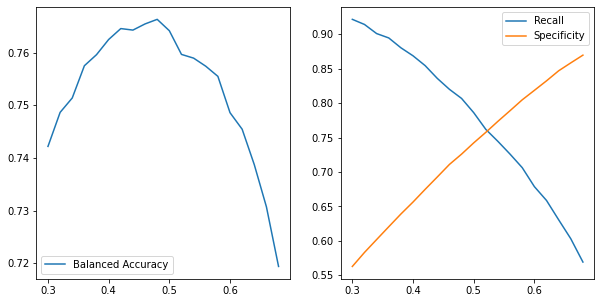

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
plt.plot(edges,balanced_accuracies, label = 'Balanced Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(edges,recalls, label = 'Recall')
plt.plot(edges,specificities, label = 'Specificity')
plt.legend();

We see that the best accuracy is at 0.5, but if we want either higher recall or specificity without losing too much accuracy, we have a range of choices.

This wraps up our discussion on logistic regression. We didn't need the hyper_test set.

## Support Vector Machines

In [ ]:
!pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.2 MB/s 


While logistic regression is relatively fast, for a data set this size, svm takes ages just to fit a single model, 26 seconds.

In [ ]:
balanced_accuracy = balanced_accuracy_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid])))
recall = recall_score(pd.concat([y_nu_hyper_valid,y_hyper_valid]),abc.predict(pd.concat([X_nu_hyper_valid,X_hyper_valid])))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7591481830437169
 recall is 0.8253043938591847
 specificity is 0.692991972228249


In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_valid,abc.predict(X_hyper_valid))
recall = recall_score(y_hyper_valid,abc.predict(X_hyper_valid))
specificity = 2*balanced_accuracy - recall
auc_score = roc_auc_score(y_hyper_valid,abc.predict(X_hyper_valid))
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}'
      f'\n auc is {auc_score}'
      )

balanced accuracy is 0.7605903412594892
 recall is 0.8253043938591847
 specificity is 0.6958762886597937
 auc is 0.7605903412594893


We have that the balanced accuracy is slightly worse than logistic regression but at this point its hyperparameters are unoptimized.

BayesSearchCV takes 28 seconds per iteration.

In [ ]:
from sklearn.svm import SVC

from skopt import BayesSearchCV

def pipe_svc(**params):
  return make_pipeline(
    adjustFeatures(),
    StandardScaler(),
    SVC(**params)
  )

opt = BayesSearchCV(
    pipe_svc(),
    {
        'svc__C': (1e-6, 1e+6, 'log-uniform'),
        'svc__gamma': (1e-6, 1e+1, 'log-uniform'),
        'svc__degree': (1, 8),  # integer valued parameter
        'svc__kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=10,
    cv=2,
    verbose = 10
)

opt.fit(pd.concat([X_train,X_hyper_valid]), pd.concat([y_train,y_hyper_valid]))

print("val. score: %s" % opt.best_score_)
print("best params: %s" % str(opt.best_params_))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START svc__C=0.03144040516756292, svc__degree=5, svc__gamma=2.6374232412240206e-06, svc__kernel=poly
[CV 1/2; 1/1] END svc__C=0.03144040516756292, svc__degree=5, svc__gamma=2.6374232412240206e-06, svc__kernel=poly;, score=0.501 total time=  15.6s
[CV 2/2; 1/1] START svc__C=0.03144040516756292, svc__degree=5, svc__gamma=2.6374232412240206e-06, svc__kernel=poly
[CV 2/2; 1/1] END svc__C=0.03144040516756292, svc__degree=5, svc__gamma=2.6374232412240206e-06, svc__kernel=poly;, score=0.500 total time=   9.6s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START svc__C=7.684036487450947e-05, svc__degree=4, svc__gamma=1.4838971623835397e-05, svc__kernel=linear
[CV 1/2; 1/1] END svc__C=7.684036487450947e-05, svc__degree=4, svc__gamma=1.4838971623835397e-05, svc__kernel=linear;, score=0.759 total time=   8.1s
[CV 2/2; 1/1] START svc__C=7.684036487450947e-05, svc__degree=4, svc__gamma=1.4838971623835

BayesSearchCV got stuck again.

I guess I should do some exploratory analysis on the ranges.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

def pipe_svc(**params):
  return make_pipeline(
    adjustFeatures(),
    StandardScaler(),
    SVC(**params)
  )


In [ ]:
from sklearn.svm import SVC

for exp in range(-6,7,3):
  params = {'C':10**exp}
  abc = pipe_svc(**params)
  abc.fit(X_train,y_train)
  print(f'for C = {10**exp}, the accuracy on the single target data is '
        f'{accuracy_score(y_hyper_valid,abc.predict(X_hyper_valid))}')

for C = 1e-06, the accuracy on the single target data is 0.4933402977278663
for C = 0.001, the accuracy on the single target data is 0.6936536954818491
for C = 1, the accuracy on the single target data is 0.7636458605379994


Here we see it can't fit the model for C = 1000.

In [ ]:
from sklearn.svm import SVC

params = {'C':10**1}
abc = pipe_svc(**params)
abc.fit(X_train,y_train)
print(f'for C = {10**1}, the accuracy on the single target data is '
      f'{accuracy_score(y_hyper_valid,abc.predict(X_hyper_valid))}')

for C = 10, the accuracy on the single target data is 0.7461478192739619


That took 70 seconds and is no better than C = 1 so maybe it's best to restrict that. Or just use hyperopt.

In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-fxoao73m
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-fxoao73m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 7.0 MB/s 
     |████████████████████████████████| 199 kB 39.3 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-1.0.3-py3-none-any.whl size=135026 sha256=2a8418e4017d750920ae1a4ef886f07d243359153aea6fae4dec1f90e3942bdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-3eoer3ka/wheels/4b/06/53/c35e360ca94aa0ab93518bf53abe5fb270c95dbe56b8e2e76b
Successfully built hpsklearn
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing
from hyperopt import tpe

def half_pipe_svc(X):
  return StandardScaler().fit_transform(adjustFeatures().transform(X))

estim = HyperoptEstimator(classifier=svc("svc"),
                            preprocessing=[],
                            algo=tpe.suggest,
                            max_evals=30,
                            trial_timeout=60,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Training learner SVC(C=0.8381810639406336, coef0=0.6635016867918315, degree=2, gamma='auto',
    kernel='poly', random_state=2, shrinking=False, tol=0.0035792005106690594) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 77.0 +- 0.4
100%|██████████| 1/1 [00:18<00:00, 18.23s/trial, best loss: 0.22981528054808775]
Will use the last 0.5 portion of samples for validation
Training learner SVC(C=0.8041629090831695, coef0=0.4026973000535281, degree=2, gamma='auto',
    random_state=2, tol=0.005035846126423595) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 77.0 +- 0.4
100%|██████████| 2/2 [00:23<00:00, 23.72s/trial, best loss: 0.22981528054808775]
Will use the last 0.5 portion of samples for validation
Training learner SVC(C=1.048836580411418, coef0=0.7161758623594368,
    decision_function_shape='ovo', degree=5, gamma='auto', 

Note hyperopt uses sigmoid kernel which is not separable. Here it chose a valid kernel.

Now we need to use the test set to see if we overfit (used too many iterations).

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7750240968904534
 recall is 0.8152920962199313
 specificity is 0.7347560975609755


We gained a whole percentage point with SVM.

In [ ]:
np.sqrt(balanced_accuracy*(1-balanced_accuracy)/len(y_hyper_test))

0.006140683193255352

That's almost two standard deviations.

## Others

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing
from hyperopt import tpe

def half_pipe_svc(X):
  return StandardScaler().fit_transform(adjustFeatures().transform(X))

estim = HyperoptEstimator(classifier=any_classifier("any_classifier"),
                            preprocessing=[],
                            algo=tpe.suggest,
                            max_evals=30,
                            trial_timeout=60,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Training learner SGDClassifier(alpha=0.0001501524347333818, eta0=0.0003455556826592064,
              l1_ratio=0.000887217523378405, max_iter=1247, n_iter_no_change=6,
              n_jobs=1, penalty='l1', power_t=0.8450853653966415,
              random_state=3, tol=0.002594065702893258) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 76.1 +- 0.4
100%|██████████| 1/1 [00:00<00:00,  1.54trial/s, best loss: 0.23900789177001125]
Will use the last 0.5 portion of samples for validation
Training learner ExtraTreeClassifier(criterion='entropy', max_features=0.5707887688000991,
                    random_state=0) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 67.7 +- 0.4
100%|██████████| 2/2 [00:00<00:00,  1.65trial/s, best loss: 0.23900789177001125]
Will use the last 0.5 portion of samples for validation
Training learner AdaB

Here we get back logistic regression as the best one but XGBoost was pretty good, too. Let's try that.

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing, xgboost_classification
from hyperopt import tpe

def half_pipe_svc(X):
  return StandardScaler().fit_transform(adjustFeatures().transform(X))

estim = HyperoptEstimator(classifier=xgboost.xgboost_classification("xgboost"),
                            preprocessing=[],
                            algo=tpe.suggest,
                            max_evals=10,
                            trial_timeout=120,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Training learner XGBClassifier(colsample_bylevel=0.6581738899190128,
              colsample_bytree=0.8882684974027155, gamma=1.3784833614665702e-05,
              learning_rate=0.0061899315777367014, max_depth=5,
              min_child_weight=15, n_estimators=3400,
              reg_alpha=0.8637997689701978, reg_lambda=2.6856474653462836,
              seed=0, subsample=0.7323158346256016, use_label_encoder=False) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 76.6 +- 0.4
100%|██████████| 1/1 [00:57<00:00, 57.60s/trial, best loss: 0.23363108143265976]
Will use the last 0.5 portion of samples for validation
Training learner XGBClassifier(colsample_bylevel=0.8298206824250521,
              colsample_bytree=0.8747166575312879, gamma=0.00014147131393776527,
              learning_rate=0.009503838357633222, max_depth=8,
              min_child_weight=21, n_estimators=3400,
    

It maybe was still getting better? Also RandomForest and GradientBoosting may also yield good classifiers.

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7732288037166086
 recall is 0.7916666666666666
 specificity is 0.7547909407665506


It was not overfit.

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing, gradient_boosting_classifier
from hyperopt import tpe

def half_pipe_svc(X):
  return StandardScaler().fit_transform(adjustFeatures().transform(X))

estim = HyperoptEstimator(classifier=gradient_boosting_classifier("gradient_boost"),
                            preprocessing=[],
                            algo=tpe.suggest,
                            max_evals=30,
                            trial_timeout=120,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Training learner GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.003483172683846227,
                           loss='exponential', max_features=0.7618084716895964,
                           n_estimators=49, random_state=1, verbose=False) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 74.1 +- 0.4
100%|██████████| 1/1 [00:01<00:00,  1.32s/trial, best loss: 0.2593010146561443]
Will use the last 0.5 portion of samples for validation
Training learner GradientBoostingClassifier(learning_rate=0.008188454442307447,
                           loss='exponential', max_features=0.5718162712912555,
                           min_impurity_decrease=0.05, min_samples_leaf=50,
                           n_estimators=21, random_state=0, verbose=False) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial wi

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7778910281739047
 recall is 0.8101374570446735
 specificity is 0.7456445993031358


In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing, random_forest_classifier
from hyperopt import tpe

def half_pipe_svc(X):
  return StandardScaler().fit_transform(adjustFeatures().transform(X))

estim = HyperoptEstimator(classifier=random_forest_classifier("random_forest_classifier"),
                            preprocessing=[],
                            algo=tpe.suggest,
                            max_evals=30,
                            trial_timeout=120,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Training learner RandomForestClassifier(bootstrap=False, max_features=0.25749235328853326,
                       min_samples_leaf=14, n_estimators=485, n_jobs=1,
                       random_state=2, verbose=False) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 76.8 +- 0.4
100%|██████████| 1/1 [00:08<00:00,  8.26s/trial, best loss: 0.23241696296938685]
Will use the last 0.5 portion of samples for validation
Training learner RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None, min_samples_leaf=18, n_estimators=590,
                       n_jobs=1, random_state=1, verbose=False) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 76.6 +- 0.4
100%|██████████| 2/2 [00:19<00:00, 19.13s/trial, best loss: 0.23241696296938685]
Will use the last 0.5 portion of samples for v

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7743378593579751
 recall is 0.8200171821305842
 specificity is 0.728658536585366


Let's redo the SGDClassifier to replace logistic regression.

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing, sgd_classifier
from hyperopt import tpe

def half_pipe_svc(X):
  return adjustFeatures().transform(X) # here we let it choose its own scaler since SGD is so fast

estim = HyperoptEstimator(classifier=sgd_classifier("sgd_classifier"),
                            preprocessing=None,
                            algo=tpe.suggest,
                            max_evals=100,
                            trial_timeout=10,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Fitting Normalizer() to X of shape (11531, 32)
Transforming Xfit (11531, 32)
Transforming Xval (11531, 32)
Training learner SGDClassifier(alpha=0.006530510701898086, eta0=0.0006294273296751716,
              l1_ratio=1.0602895601860337e-05, loss='modified_huber',
              max_iter=958, n_jobs=1, power_t=0.635331096220262, random_state=2,
              tol=0.0004041753155139547) on X/EX of dimension (11531, 32)
Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 71.2 +- 0.4
100%|██████████| 1/1 [00:00<00:00,  1.31trial/s, best loss: 0.2884398577746943]
Will use the last 0.5 portion of samples for validation
Fitting PCA(n_components=40) to X of shape (11531, 32)
Limited PCA n_components at 32
Transforming Xfit (11531, 32)
Transforming Xval (11531, 32)
Training learner SGDClassifier(alpha=0.002898850369911811, eta0=0.006280434152651031,
              l1_ratio=0.0002201324967636544, loss='modified_huber',
     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,



Scoring on X/EX validation of shape (11531, 32)
OK trial with accuracy 67.5 +- 0.4
100%|██████████| 22/22 [00:02<00:00,  2.46s/trial, best loss: 0.22747376636891858]
Will use the last 0.5 portion of samples for validation
Fitting PCA(n_components=28, whiten=True) to X of shape (11531, 32)
Limited PCA n_components at 28
Transforming Xfit (11531, 32)
Transforming Xval (11531, 32)
Training learner SGDClassifier(alpha=0.0005975608118581524, eta0=0.0024459962535232677,
              l1_ratio=4.40130234473693e-05, learning_rate='adaptive',
              loss='modified_huber', max_iter=1238, n_jobs=1, penalty='l1',
              power_t=0.4540649084483293, random_state=3,
              tol=0.0007782994908442583) on X/EX of dimension (11531, 28)
Scoring on X/EX validation of shape (11531, 28)
OK trial with accuracy 77.1 +- 0.4
100%|██████████| 23/23 [00:00<00:00,  1.74trial/s, best loss: 0.22747376636891858]
Will use the last 0.5 portion of samples for validation
Fitting StandardScaler() to X 

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

Fitting StandardScaler() to X of shape (4624, 32)
Transforming Xfit (4624, 32)
Fitting StandardScaler() to X of shape (4624, 32)
Transforming Xfit (4624, 32)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


balanced accuracy is 0.7735266472694182
 recall is 0.811426116838488
 specificity is 0.7356271777003485


Let's redo XGBoost with more time. I also forgot to do PCA with the random forest ... doesn't matter?

In [ ]:
from hpsklearn import HyperoptEstimator, svc, any_classifier, any_preprocessing, xgboost_classification
from hyperopt import tpe

def half_pipe_svc(X):
  return adjustFeatures().transform(X) # again, we let it do its own preprocessing

estim = HyperoptEstimator(classifier=xgboost.xgboost_classification("xgboost"),
                            preprocessing=any_preprocessing('any'),
                            algo=tpe.suggest,
                            max_evals=30,
                            trial_timeout=180,
                             verbose=10)

estim.fit(half_pipe_svc(pd.concat([X_train,X_hyper_valid])), pd.concat([y_train,y_hyper_valid]),valid_size = 0.5)

print(estim.best_model())

Will use the last 0.5 portion of samples for validation
Fitting PCA(n_components=16, whiten=True) to X of shape (11531, 32)
Limited PCA n_components at 16
Transforming Xfit (11531, 32)
Transforming Xval (11531, 32)
Training learner XGBClassifier(colsample_bylevel=0.7224039869782594,
              colsample_bytree=0.8258654354010918, gamma=0.0005189983767663817,
              learning_rate=0.015501134115838037, max_depth=4,
              min_child_weight=24, n_estimators=2400,
              reg_alpha=0.09960254766658994, reg_lambda=2.969277329841735,
              seed=2, subsample=0.978542622968217, use_label_encoder=False) on X/EX of dimension (11531, 16)
Scoring on X/EX validation of shape (11531, 16)
OK trial with accuracy 76.1 +- 0.4
100%|██████████| 1/1 [00:37<00:00, 37.90s/trial, best loss: 0.2390946145173879]
Will use the last 0.5 portion of samples for validation
Fitting MinMaxScaler(feature_range=(-1.0, 1.0)) to X of shape (11531, 32)
Transforming Xfit (11531, 32)
Transforming

Looks like hyperopt doesn't both use scaler and pca at the same time like it should, only one or the other. Maybe it doesn't matter. Looks like I set the timeout too low, again. Every second time it times out towards the end. Also, maybe it is still learning towards the end?

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
recall = recall_score(y_hyper_test,estim.predict(half_pipe_svc(X_hyper_test)))
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

Fitting StandardScaler(with_mean=False) to X of shape (4624, 32)
Transforming Xfit (4624, 32)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Fitting StandardScaler(with_mean=False) to X of shape (4624, 32)
Transforming Xfit (4624, 32)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


balanced accuracy is 0.7743288791503526
 recall is 0.8213058419243986
 specificity is 0.7273519163763067


# Model Comparison

In [ ]:
grad_boost:
 balanced accuracy is 0.7778910281739047
 recall is 0.8101374570446735
 specificity is 0.7456445993031358

svm:
 balanced accuracy is 0.7750240968904534
 recall is 0.8152920962199313
 specificity is 0.7347560975609755

random forest:
 balanced accuracy is 0.7743378593579751
 recall is 0.8200171821305842
 specificity is 0.728658536585366

XGBoost:
 balanced accuracy is 0.7743288791503526
 recall is 0.8213058419243986
 specificity is 0.7273519163763067

log:
 balanced accuracy is 0.7735266472694182
 recall is 0.811426116838488
 specificity is 0.7356271777003485

majority:
 balanced accuracy is 0.7776133900882455
 recall is 0.8187285223367697
 specificity is 0.7364982578397212

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

gradient = GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.014998018311808388, max_depth=2,
                           min_samples_leaf=4, n_estimators=964, random_state=3,
                           verbose=False)

log = SGDClassifier(alpha=0.003796516016920572, eta0=0.04314645174365941,
              l1_ratio=5.047604742290539e-05, learning_rate='adaptive',
              max_iter=1107, n_jobs=1, penalty='l1', power_t=0.6916425908012218,
              random_state=0, tol=0.00025096315295542484)

rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=11,
                       n_estimators=1672, n_jobs=1, random_state=4,
                       verbose=False)

svc = SVC(C=1.2675243102662284, coef0=0.6956650525127147, degree=2, gamma='auto',
    kernel='linear', random_state=0, shrinking=False, tol=0.003237384972125895)

xgboost = xgb.XGBClassifier(colsample_bylevel=0.9168576100341644,
              colsample_bytree=0.7646135705468063, gamma=2.0368111049750572,
              learning_rate=0.00043823603393724787, max_depth=7,
              min_child_weight=4, n_estimators=3400,
              reg_alpha=0.09346520247207356, reg_lambda=1.1489017137099529,
              seed=2, subsample=0.5543761362422848, use_label_encoder=False)

In [ ]:
vote_clf = MajorityVoteClassifier(classifiers=[gradient,log,rf,svc,xgboost])

X_train_2 = pd.concat([X_train,X_hyper_valid])
y_train_2 = pd.concat([y_train,y_hyper_valid])

vote_clf.fit(X_train_2,y_train_2)

MajorityVoteClassifier(classifiers=[GradientBoostingClassifier(criterion='squared_error',
                                                               learning_rate=0.014998018311808388,
                                                               max_depth=2,
                                                               min_samples_leaf=4,
                                                               n_estimators=964,
                                                               random_state=3,
                                                               verbose=False),
                                    SGDClassifier(alpha=0.003796516016920572,
                                                  eta0=0.04314645174365941,
                                                  l1_ratio=5.047604742290539e-05,
                                                  learning_rate='adaptive',
                                                  max_iter=1107, n_jobs=1,
                          

In [ ]:
clf_predictions = {}
for i,clf in enumerate(vote_clf.classifiers):
  clf_predictions[i] = clf.predict(X_hyper_test)

In [ ]:
abc = []
for i in range(len(clf_predictions[0])):
  sum = 0
  for j in range(5):
    sum += clf_predictions[j][i]
  if sum > 2:
    abc.append(1.0)
  else:
    abc.append(0.0)

In [ ]:
abc

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0

In [ ]:
len(abc)

4624

In [ ]:
len(y_hyper_test)

4624

In [ ]:
balanced_accuracy = balanced_accuracy_score(y_hyper_test,abc)
recall = recall_score(y_hyper_test,abc)
specificity = 2*balanced_accuracy - recall
print(f'balanced accuracy is {balanced_accuracy}\n recall is {recall}\n specificity is {specificity}')

balanced accuracy is 0.7776133900882455
 recall is 0.8187285223367697
 specificity is 0.7364982578397212
